# Vivek Bavda:
## DSIR 7/12
### Project 2 August 9, 2021 
### Fair Housing: Predicting Home Sale Prices in Ames, Iowa

### Introduction:
*As you are aware Ms. Mayor of Ames, Iowa, there have been concerns about redlining, restrictive covenants, and discrimination by homesellers in our city toward traditionally disadvantaged groups in our country. Given the uproar and your desire to integrate the community, you've asked me to provide a gender and color neutral model of housing prices to determine if there has been a premium required for people of color on homes bought in Ames, Iowa.*

### Contents:
- [Background](#Background)
- [Outside Research](#Outside-Research)
- [Ames Housing Data Sets](#Ames-Housing-Data-Sets)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis and Data Visualizations](#Exploratory-Data-Analysis-and-Data-Visualizations)
- [Modeling](#Modeling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## [Background](#Background)

The City of Ames, Iowa is committed toward equity in housing. The Mayor has made fair housing a centerpiece of his political campaign and is committed to making the goals of Title VI of the Civil Rights Act of 1964 a reality.   

As stated on the City of Ames website, the city will “'Affirmatively further fair housing', which means that the City actively works to reduce illegal housing discrimination. The City promotes equal housing opportunity through education and training, monitoring and investigating fair housing complaints utilizing techniques to support fair housing litigation, and conduct research and studies to identify and address fair housing impediments.[*source*](https://www.cityofames.org/government/departments-divisions-a-h/housing/fair-housing) To be clear Title VI and "the Fair Housing Act prohibit housing discrimination based on race, color, national origin, religion, handicap, sex, familial status (including children under the age of 18 living with parents or legal custodians; pregnant women and people securing custody of their children under 18).[*source*](https://www.cityofames.org/government/departments-divisions-a-h/housing/fair-housing)

As stated above, the city will conduct studies to meet this end, and Bavda Consulting was hired to build a predictive model on housing sale prices to see whether there was discrimination in transactions. Through Multivariate Linear Regression, this data analysis seeks to predict housing prices that are gender and color neutral based on inputs such as square feet, the number of bathrooms and other concrete variables that should determine housing prices. The government has a dataset deemed Ames Training Dataset, which was used to create this model. After the model is built and presented, the Mayor will use the model on a dataset deemed Ames Testing Dataset whose purchases were are unknown to Bavda Consulting. The model will be tested on these transactions to gauge its predictive power. While there is always irreducable error to some extent, the Mayor has set a statistical benchmark goal of 32,000 or less in root mean squared error. This is based on other submissions from his interns and volunteers who scored from 35,000 to the use of the mean as the predictory, which scores appoximately 80,000. This should ensure that the predictions are accurate and will be used to test sellers to see if people of color are forced to pay a premium to purchase homes. This will allow the city focus on the people and places that see the greatest variation in sales price from predicted price.


## [Outside Research](#Outside-Research)
The value of the study is especially important in terms of identifying and rooting out overt and covert discrimination. As John Oliver made clear on his program Last Week Tonight [*source*](https://www.youtube.com/watch?v=_-0J49_9lwc), past overt housing discrimination has lead to the huge gaps in wealth we now know. Most majority Americans have used their homes as an investment vehicle to accumulate wealth. Given that people of color have been left out through outright bans, restrictive covenants(agreements between homeowners to not to sell to people of color, and then redlining, the practice of financial institutions to not lend to people of color for homes in majority communities, this has lead to people of color accumulating far less wealth and essentially segregation through higher prices in wealthier neighborhoods. Even when people of color have the weatlh to purchase homes, they often are forced to pay a premium. This covert discrimination is the target of study. As is mentioned above, the Mayor wants Ames to be different. This analysis is one step in the Mayor's larger plan. Identifying transactions can focus the city and chip away at housing discrimination.

## [Ames Housing Datasets](#Ames-Housing-Datasets)
#### 2006 - 2010

#### The Data Dictionary can be accessed [*here*](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) at its original source location or within this repository [*here*](./datasets/AmesDataDictionary.docx).

* [AmesDatasetTrain]('./datasets/train.csv'): Data set contains information from the Ames, Iowa Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. This dataset has been divided into this train set and validation set by the Mayor for Bavda Consulting to use to create its model. T The data has 81 columns which include 22 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers). 


* [AmesDatasetTest](./datasets/test.csv):Data set contains information from the Ames, Iowa Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. This dataset has been divided into a train set (above) and a validation set. This validation set includes 80 of 81 columns which include 22 nominal, 23 ordinal, 14 discrete, and 19 continuous variables (and 2 additional observation identifiers). The missing column is Sale Price in this dataset. This data is to be filled by Bavda Consulting using the 81 columns. This ensures and checks that the model developed by Bavda Consulting accurately predicts the price.
    
    
* [AmesDatasetKagle]('./datasets/BavdaFinal.csv'): Data set contains the predictions for the validation set. This dataset has been submitted to the Mayor alongside with this report and model.


* Cautionary Note: The amount of observations provided by the Mayor is approximately 2000 observations while there are 82 variables if you include the dependent variable and the identification variables. As a rule of thumb, for every 400 observations, the model to be accurate would need one feature also knows as an independent variable. This suggests that there would be only be 5 features in the model. Given the complexity of the housing market, even without exploratory data analysis, this model probably does not have enough data to answer the problem statement. 


* Outliers: There are outlandishly expensive for Ames more than 2 standard deviations from the mean up to a $611,657 maximum sale price for one home in this data. They appear to be out of the norm. They have not been removed for two reasons. First, the Mayor has specifically asked us not to exclude data. Second, too often, data scientists remove outliers because they do not match their assumptions about the problem. When these points are removed, the 'usual' model does work. However, the outlier is still real and may occur. When it does, Wall St. analysts, for example, claim 'black swans' far too often, resulting in major losses for their customers. The point is each observation matters.

## [Data Import and Cleaning](#Data-Import-and-Cleaning)

* This section goes hand and hand with Exploratory Data Analysis. As you can see below, libraries with the tools necessary to complete this work are imported. This includes pandas and sklearn as well as others. Summary Statistics are seen for the dataframes


* All of the features and target are viewed. Functions named datacleaning and datacleaningbox were used to look at summary statistics, check histograms, correlation, and plots in order to determine if there is a linear relationship between the feature and target. Data types and null values are checked in these functions. Null values are removed for the relevant variables. The median is imputed for values if the variable has a null value but is too large to ignore. Other rows win null values are small in number are simply dropped.


* There is transformation and merging of variables. The relevant features are one-hot coded-otherwise known as dummy variables. There is a comment explaining the reason for inclusion or exclusion into the model. The next section will provide more visuals regarding the included variables.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics




In [2]:
##Loading Data

AmesDatasetTrain='./datasets/train.csv'

AmesDatasetTest='./datasets/test.csv'

AmesDatasetKagle='./datasets/BavdaFinal.csv'

dftrain=pd.read_csv(AmesDatasetTrain)

dftest=pd.read_csv(AmesDatasetTest)

dfkagle=pd.read_csv(AmesDatasetKagle)

In [3]:
dftrain  #Quick first check

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [4]:
dftrain.describe() #Summary Statistics to start off

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [5]:
# Check for nulls
dftrain.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [6]:
#check Data types
dftrain.dtypes.sort_values().head(60)

Id                   int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
1st Flr SF           int64
Fireplaces           int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Yr Sold              int64
Wood Deck SF         int64
Year Remod/Add       int64
SalePrice            int64
Lot Area             int64
PID                  int64
MS SubClass          int64
Overall Qual         int64
Year Built           int64
Overall Cond         int64
Total Bsmt SF      float64
BsmtFin SF 2       float64
Garage Cars        float64
BsmtFin SF 1       float64
Bsmt Full Bath     float64
Bsmt Unf SF        float64
Lot Frontage       float64
Garage Yr Blt      float64
Mas Vnr Area       float64
B

Total values equal 81 variables. Please note above and below that Exterior 1 is repeated. If you count the listings there are 22 varialbes below 60 above. Remove the repeat, an you have 81.

In [7]:

dftrain.dtypes.sort_values().tail(22)

Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Sale Type         object
Heating QC        object
Central Air       object
Electrical        object
House Style       object
Bldg Type         object
Condition 2       object
Neighborhood      object
Land Slope        object
Lot Config        object
Heating           object
dtype: object

The dependent variable in this analysis is Sale Price. Below is a preliminary analysis. It appears to be normally distributed with a positive skew.

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64
0
[130500 220000 109000 174000 138500 190000 140000 142000 112500 135000
  85400 183600 131000 200000 193000 173500  98000 139000 143500 215200
 129000 278000 344133 185000 145000 187500 198000 119600 122900 230000
 270000 125000 297000 113500 127000 175500 146000 147500 465000 165500
 131500 129500 257076 117000 149000 128000 155000 166000 250000  76000
 158000 149500 121000 136000 173000 290000 303477 122250 153000 147000
 148500 130000 372000 213490 308030 300000 159500 137500 232000  93850
 105000  68500 154300 129850 114000 501837 153900 160500 310090 184900
 132000 163000 183000 211000 184000 118858 180500 148000 124000 277500
 350000 387000  86000  44000 215000 146500 165000 252000 150000 139900
 162900 160000  63900 149900 231500 108000 120000 128500 115000 110000
 

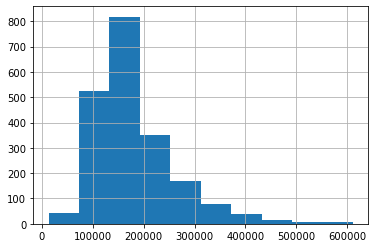

In [8]:
print(dftrain['SalePrice'].describe())
print(dftrain['SalePrice'].isnull().sum())
print(dftrain['SalePrice'].unique())
print(dftrain['SalePrice'].value_counts())
print(dftrain['SalePrice'].hist())
   



In [9]:
dftest

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


## Functions Used for Data Cleaning and Exploration

In [10]:
#For EDA and Data cleaning
def datacleaningbox(feature):
    print(dftrain[feature].describe())
    print(dftrain[feature].isnull().sum())
    print(dftrain[feature].unique())
    print(dftrain[feature].value_counts())
    print(dftest[feature].describe())
    print(dftest[feature].isnull().sum())
    print(dftest[feature].unique())
    print(dftest[feature].value_counts())
    print(dftrain[feature].hist())
    sns.pairplot(dftrain, x_vars=[feature], y_vars=['SalePrice'])
    print(dftrain[[feature, 'SalePrice']].corr())
    sns.boxplot(x=dftrain['SalePrice'], y=dftrain[feature])
    return

def datacleaning(feature):
    print(dftrain[feature].describe())
    print(dftrain[feature].isnull().sum())
    print(dftrain[feature].unique())
    print(dftrain[feature].value_counts())
    print(dftest[feature].describe())
    print(dftest[feature].isnull().sum())
    print(dftest[feature].unique())
    print(dftest[feature].value_counts())
    print(dftrain[feature].hist())
    sns.pairplot(dftrain, x_vars=[feature], y_vars=['SalePrice'])
    print(dftrain[[feature, 'SalePrice']].corr())
    return

def lasso_coefs(X, y, alphas):
    coefs = []
    lasso_reg = Lasso()
    for a in alphas:
        lasso_reg.set_params(alpha=a)
        lasso_reg.fit(X, y)
        coefs.append(lasso_reg.coef_)
        
    return coefs

def print_results(scores_list):
    return f'''
    [min, max] = 
                        {[round(min(scores_list), 2), round(max(scores_list), 2)]}
    
    confidence interval: 
                         {round(mean(scores_list), 2)} \u00B1 {round(2 * stdev(scores_list), 2)}
    '''

## Each variable has undergone an examination
## through the use of above functions



Variable 1: Id is an index.  It is not in the data dictionary included with the repoository. No relevance to this project other than to identify predictions for the validation set

count    2051.000000
mean     1474.033642
std       843.980841
min         1.000000
25%       753.500000
50%      1486.000000
75%      2198.000000
max      2930.000000
Name: Id, dtype: float64
0
[109 544 153 ... 916 639  10]
2049    1
749     1
2556    1
507     1
505     1
       ..
1068    1
1066    1
1062    1
1060    1
2047    1
Name: Id, Length: 2051, dtype: int64
count     878.000000
mean     1444.749431
std       850.838263
min         2.000000
25%       692.250000
50%      1433.000000
75%      2197.500000
max      2928.000000
Name: Id, dtype: float64
0
[2658 2718 2414 1989  625  333 1327  858   95 1568 2482 1364 2584  818
 2673 2089 1297  790 2616  720  222  557 1148 2766  534 1452  630 2648
  125 1904 1670  756  717 1032  852 1731 2639 2071 1267 1851  567 2439
 1898  647 2256  979 1444 2485  157   88 2003  186 1425 2695  738  395
 1353 1878  390 1456 1103 1387 2070 1199 2479  501 2362 1718 2188 1483
 2557  437 2224 1628  397  587  971 2611 1887 2399 2148  304 1997 2817
 1431  

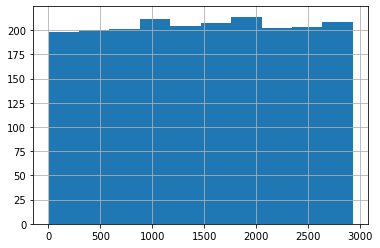

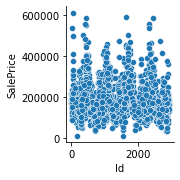

In [11]:
datacleaning('Id')             


'2nd Flr SF' is the second variable examined. There are no nulls. There are 0's.
This is probably ranch or single story homes. This was combined with '1st Flr SF'
to get an overall 'square_feet' number for each house

count    2051.000000
mean      329.329108
std       425.671046
min         0.000000
25%         0.000000
50%         0.000000
75%       692.500000
max      1862.000000
Name: 2nd Flr SF, dtype: float64
0
[ 754 1209    0  700  614 1040  504  728  645  720  783 1044  673  957
  252  725  550  745  890  620  651  862  756  653 1392  546  689  600
 1106 1426  780  531  732  739 1169  665  616  540  786 1368 1157  709
  690  445  836  564 1345  707  650  712  676  601  240 1862  881  408
 1427  857 1074  876 1045  813  927  576  539  586  624 1182  702 1093
  884  743  941 1312 1384 1296  492  462  981 1277 1254  272  750  608
  656 1370  595  797  960  549  703 1250  453  561  685  636  872  886
  840  829  670  795  505  698  537  864  804  704  412  924  896  376
  438 1371 1089  755  589 1158  980 1038  517  925  602  887  741  348
  390 1036  672  475  464 1194  530  701  929  584  465  319  563  695
  668  582  545 1005  757  585  684  787  888  336  551  903 1198  524
  482  869  738 

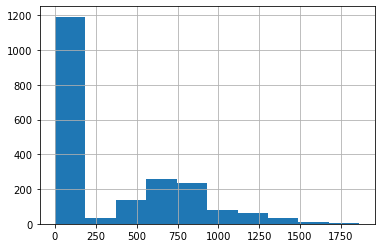

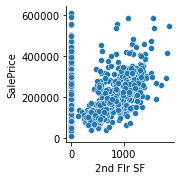

In [12]:

datacleaning('2nd Flr SF')

'1st Floor SF' contains no nulls nor absurdities such as 0's. It makes sense to combine this variable with 2nd Floor SF to create square_feet.

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st Flr SF, dtype: float64
0
[ 725  913 1057  744  831 1888 1072 1188  924 1040  483 1208 1288  962
 1361 1430  624 1121 1285  764  894 1659 1209 1187 1056 1453 1265 1034
  672 2524  792 1494  948 1718 1142  925 1844 1242  990 1256 2076 1110
 1050  983  984  851 1063  768 1328 1392  546 1575  663  600  936  916
 1164 1184 1483  960 1382 1120  567  976 1802 1506 1508 2032 1194  970
 1616  872  520 1105  616 2234  876  864 1189 1666 1200  928 1336 1427
 1212  754 1535 1152 1151 1138 1074 1561 1358 1884  605 1671  797  804
 1193  673 1664 1390  868 1422 1128 1116  660 1707 1466 1638 1721  996
 1202  988 1028  720 1599  707  959  813 1092 1055  676  855 1719  780
 1554 1528 1008 1172 1418  495  985  888 1992 1478  950  912 1326 1204
  798 1236 1416  946 1088  816  536  572 1126  992  752 1218 1601 1313
  807 1325  733 

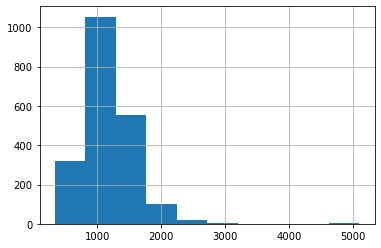

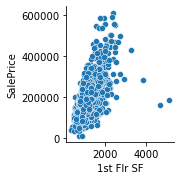

In [13]:

datacleaning('1st Flr SF')

count    2051.000000
mean     1493.817162
std       497.618666
min       334.000000
25%      1124.500000
50%      1440.000000
75%      1728.000000
max      5642.000000
Name: square_feet, dtype: float64
0
[1479 2122 1057 ... 2668 1913 1804]
864     25
1040    20
1092    19
1456    15
1200    14
        ..
1892     1
2057     1
1898     1
1908     1
2037     1
Name: square_feet, Length: 1051, dtype: int64
count     878.000000
mean     1494.185649
std       505.042804
min       407.000000
25%      1108.250000
50%      1436.000000
75%      1776.000000
max      4476.000000
Name: square_feet, dtype: float64
0
[1928 1967 1496  968 1394 1092 1093 1268 1680 1279 1217 1040 1375 2787
 1827 1340 1436 1073 1773 1742 1060  864 1617  988 1218 1738 1750 1054
  670  858  848 2640 1178 1492 1458 1657  998  910 1358 1224 1886 1327
 1363 1501 1344 1786  965  936 1248 2268 1615 1360 1142 1026 1820 1193
 1865 2006 1140 1176 1670 1603 2063 1302  774  747 2520 1560 1472 1050
 1724 1771 1207  882 1780 1459 110

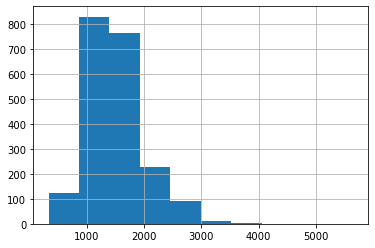

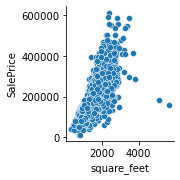

In [14]:
#Execution of above statements
dftrain['square_feet'] = dftrain['1st Flr SF'] + dftrain['2nd Flr SF']
dftest['square_feet']=dftest['1st Flr SF'] + dftest['2nd Flr SF']
datacleaning('square_feet')

'Low Qual Fin SF' is examined. This appears to be a useless variable. There are not enough data points to be useful.


count    2051.000000
mean        5.512921
std        51.068870
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: Low Qual Fin SF, dtype: float64
0
[   0  205   80  528  513  371  473  108 1064  515  120  312  572  234
  390  697  114  512  144  514  397  140  479  259  436  156  384  360
   53  362  450]
0       2018
80         3
205        2
512        1
515        1
513        1
479        1
473        1
397        1
371        1
259        1
53         1
1064       1
572        1
528        1
514        1
450        1
436        1
390        1
384        1
362        1
360        1
312        1
234        1
156        1
144        1
140        1
120        1
114        1
108        1
697        1
Name: Low Qual Fin SF, dtype: int64
count    878.000000
mean       2.728929
std       32.572548
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      481.000000
Name: Low Qual Fin SF, dtype: floa

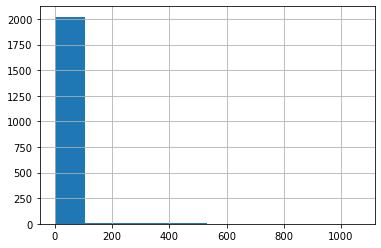

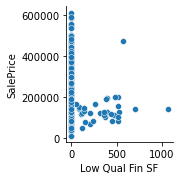

In [15]:
datacleaning('Low Qual Fin SF')  #drop id, 1stflsq, 2ndflsq, low qual.

count    2051.000000
mean        5.512921
std        51.068870
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: Low Qual Fin SF, dtype: float64
0
[   0  205   80  528  513  371  473  108 1064  515  120  312  572  234
  390  697  114  512  144  514  397  140  479  259  436  156  384  360
   53  362  450]
0       2018
80         3
205        2
512        1
515        1
513        1
479        1
473        1
397        1
371        1
259        1
53         1
1064       1
572        1
528        1
514        1
450        1
436        1
390        1
384        1
362        1
360        1
312        1
234        1
156        1
144        1
140        1
120        1
114        1
108        1
697        1
Name: Low Qual Fin SF, dtype: int64
count    878.000000
mean       2.728929
std       32.572548
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      481.000000
Name: Low Qual Fin SF, dtype: floa

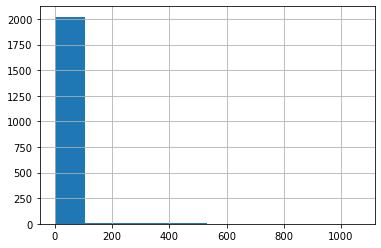

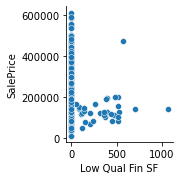

In [16]:
datacleaning('Low Qual Fin SF')  #drop id, 1stflsq, 2ndflsq, low qual.

'Gr Liv Area' is examined. This looks no different than square feet created above. Moreover,square feet's correlation is higher than this one by a small margin.
This means we can now drop id, 1stflsq, 2ndflsq, gr liv area and low qual.

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: Gr Liv Area, dtype: float64
0
[1479 2122 1057 ... 2668 1913 1804]
864     25
1040    20
1092    19
1200    16
1456    15
        ..
1894     1
1898     1
2057     1
1908     1
2037     1
Name: Gr Liv Area, Length: 1053, dtype: int64
count     878.000000
mean     1496.914579
std       506.468967
min       407.000000
25%      1114.000000
50%      1436.000000
75%      1779.000000
max      4476.000000
Name: Gr Liv Area, dtype: float64
0
[1928 1967 1496  968 1394 1092 1093 1268 1680 1279 1217 1040 1375 2787
 1827 1340 1436 1073 1773 1742 1060  864 1617  988 1218 1738 1750 1054
  670  858 1208 2640 1178 1492 1458 1657  998  910 1358 1224 1886 1327
 1363 1501 1344 1786  965  936 1248 2268 1615 1360 1142 1026 1820 1193
 1865 2006 1140 1176 1670 1603 2063 1302  774  848  747 2520 1560 1472
 1050 1724 1771 1207  882 1780 145

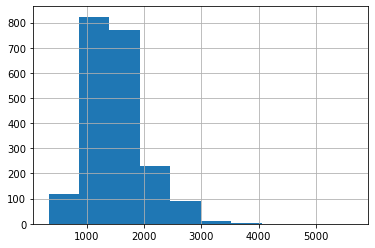

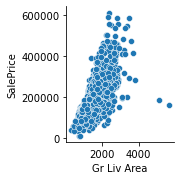

In [17]:
datacleaning('Gr Liv Area')  

'Full Bath''s .54 correlation suggest predictive power. There may be interaction
with square feet. This correlation went up when Half Bath was added.

count    2051.000000
mean        1.577279
std         0.549279
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Full Bath, dtype: float64
0
[2 1 3 0 4]
2    1096
1     900
3      45
0       8
4       2
Name: Full Bath, dtype: int64
count    878.000000
mean       1.539863
std        0.559060
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Full Bath, dtype: float64
0
[2 1 4 3 0]
2    436
1    418
3     18
0      4
4      2
Name: Full Bath, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           Full Bath  SalePrice
Full Bath   1.000000   0.537969
SalePrice   0.537969   1.000000


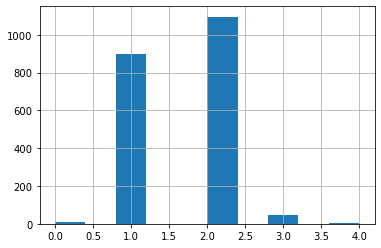

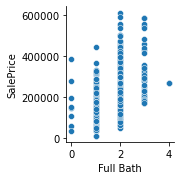

In [18]:
datacleaning('Full Bath')

count    2051.000000
mean        0.371039
std         0.501043
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Half Bath, dtype: float64
0
[1 0 2]
0    1308
1     725
2      18
Name: Half Bath, dtype: int64
count    878.000000
mean       0.398633
std        0.505927
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Half Bath, dtype: float64
0
[0 1 2]
0    535
1    336
2      7
Name: Half Bath, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           Half Bath  SalePrice
Half Bath   1.000000   0.283001
SalePrice   0.283001   1.000000
count    2051.000000
mean        1.762799
std         0.637775
min         0.000000
25%         1.000000
50%         2.000000
75%         2.500000
max         5.000000
Name: Full Bath, dtype: float64
0
[2.5 1.  2.  1.5 3.5 3.  0.5 0.  4.  5. ]
1.0    658
2.0    633
2.5    459
1.5    241
3.0     30
3.5     22
0.5      3
0.0      2
5.0   

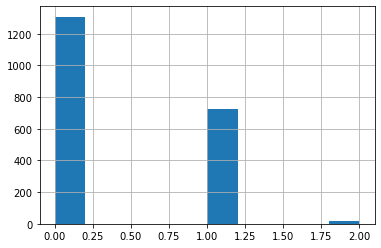

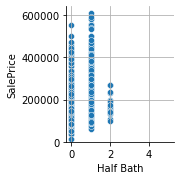

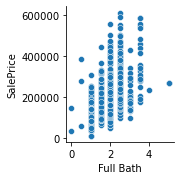

In [19]:
datacleaning('Half Bath')  #Add half to Full Bath
dftrain['Full Bath']=dftrain['Full Bath'] + ((dftrain['Half Bath'])/2)
dftest['Full Bath']=dftest['Full Bath'] + ((dftest['Half Bath'])/2)
datacleaning('Full Bath')

'Bedroom AbvGr' is examined. The correlation is surprisingly low.
This probably wouldn't be included as there are approximately 2000 observations
, which suggest we only have 5 independent varibles for use in our regression.

List of dropped variables include id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr and 'Low Qual Fin SF'
These should be included: sq feet,half bath and full Bath

count    2051.000000
mean        2.843491
std         0.826618
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: Bedroom AbvGr, dtype: float64
0
[3 4 2 5 1 0 6 8]
3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: Bedroom AbvGr, dtype: int64
count    878.000000
mean       2.879271
std        0.830712
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: Bedroom AbvGr, dtype: float64
0
[4 6 3 2 1 5 0]
3    488
2    199
4    135
1     37
6      9
5      7
0      3
Name: Bedroom AbvGr, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
               Bedroom AbvGr  SalePrice
Bedroom AbvGr       1.000000   0.137067
SalePrice           0.137067   1.000000


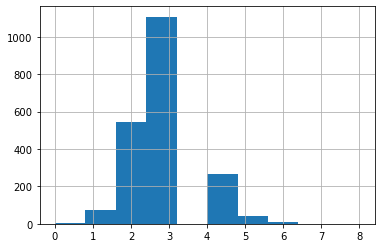

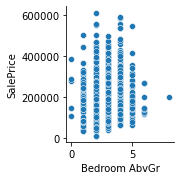

In [20]:
datacleaning('Bedroom AbvGr')   

'Kitchen AbvGr' is examined. Based on low correlation with the target and the scatterplot below, this variable is left out.


count    2051.000000
mean        1.042906
std         0.209790
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Kitchen AbvGr, dtype: float64
0
[1 2 0 3]
1    1960
2      88
0       2
3       1
Name: Kitchen AbvGr, dtype: int64
count    878.000000
mean       1.047836
std        0.223966
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Kitchen AbvGr, dtype: float64
0
[2 1 0 3]
1    835
2     41
0      1
3      1
Name: Kitchen AbvGr, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
               Kitchen AbvGr  SalePrice
Kitchen AbvGr       1.000000  -0.125444
SalePrice          -0.125444   1.000000


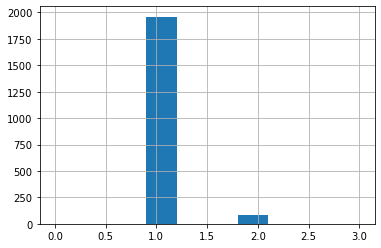

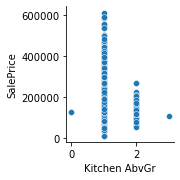

In [21]:
datacleaning('Kitchen AbvGr')

'TotRms AbvGrd' is examined. The histogram shows a wide variety of data points, and the correlation is high. There may be colinearity with Square Feet, but the Ridge and Lasso penalties used below will account for this. It is included.


count    2051.000000
mean        6.435885
std         1.560225
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRms AbvGrd, dtype: float64
0
[ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]
6     597
7     475
5     407
8     228
4     146
9      98
10     49
11     22
12     13
3      12
2       1
14      1
13      1
15      1
Name: TotRms AbvGrd, dtype: int64
count    878.000000
mean       6.454442
std        1.596632
min        3.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       12.000000
Name: TotRms AbvGrd, dtype: float64
0
[ 9 10  7  5  6  3  8  4 11 12]
6     247
5     179
7     174
8     119
4      57
9      45
10     31
3      14
11      9
12      3
Name: TotRms AbvGrd, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
               TotRms AbvGrd  SalePrice
TotRms AbvGrd       1.000000   0.504014
SalePrice           0.504014   1.000000


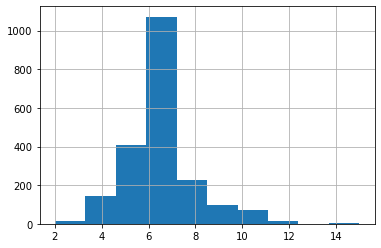

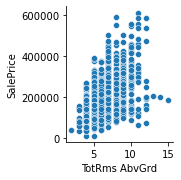

In [22]:
datacleaning('TotRms AbvGrd')



'Fireplaces' is examined below. There is a .47 correlation. Moreover, the scatterplot shows
a distinct linear relationhip.  Therefore, it is included.

count    2051.000000
mean        0.590931
std         0.638516
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64
0
[0 1 2 4 3]
0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64
count    878.000000
mean       0.618451
std        0.669571
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Fireplaces, dtype: float64
0
[0 1 2 3]
0    422
1    375
2     75
3      6
Name: Fireplaces, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Fireplaces  SalePrice
Fireplaces    1.000000   0.471093
SalePrice     0.471093   1.000000


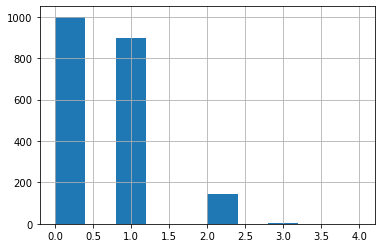

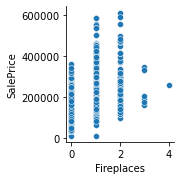

In [23]:
datacleaning('Fireplaces') 

'Open Porch SF' is examined. Due to the many 0's and the lack of a linear relationship in
the scatterplot, I have excluded this variable even though the correlation is .33. Moreover, we have only 2000 observations, which suggests a 5 variable model.

count    2051.000000
mean       47.556802
std        66.747241
min         0.000000
25%         0.000000
50%        27.000000
75%        70.000000
max       547.000000
Name: Open Porch SF, dtype: float64
0
[ 44  74  52   0  59 324  58  50  80  45 142  21  49 144  40 120  30  48
  28  26 122  68 229  27  32 112  36 172  84  57 364 105  20  46  60  75
  41  11  72  47 169  76  90 192 153  15 189 140  99  35  70 180  38  73
  34 104  96 162 108 170 285  23 128 288  56  54 136 299 154  64 158  88
  63  33 160  66 100  37  93  24  97  39 121 319  12  42 304 110 168  87
  43 235 166  25  77 101  98  82 126 211 205 200 127  85 208  55  69 228
 198 131  95 133 130 341 124 152  22 175  78 291  29 173  65 274 111  62
 114 118  18 129 365 125 116  16  92 234 141 444 372 102  51 155 119  91
   8 251 258 226  81 182 103 146 113 238 213  94 150 184  53 207 174 117
 187 240  61 123 278 191 106 292 547 243 214  67 215 225 199 138 312 260
 137 204 134 148 502 418 252 165 176 151 236 265 224 107 183 210

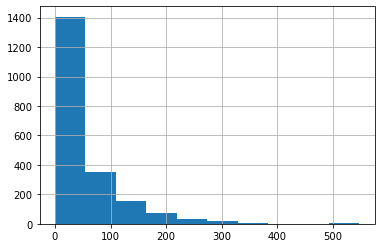

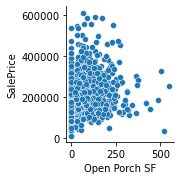

In [24]:
datacleaning('Open Porch SF')

'Enclosed Porch' is examined below. This can be dropped. There are 1700 0 values with a low correlation. With a likely 5 variable regression model, this is dropped.

count    2051.000000
mean       22.571916
std        59.845110
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       432.000000
Name: Enclosed Porch, dtype: float64
0
[  0  96 133  64 207 112 164 160 236 192  84 116  87 143 194 156 168 144
  94  36 100 120 130  16 128 176 177 364  56 216 158 208  32  70 272 324
 190  48  52  81  24 259 291 268 228  40 137 252 205 240 123 246  30 180
 114  45 172 115 265 264 211  90 280 150 134  77 368  60 213 167 102  18
  80 222 234 105 101 135  34 104 148 239 109  26  50 145 140 219 189 183
 175  66  75  72 198 122 432 330  44 162 296 200 244 214 204  20 169  43
 260 121  78 184 117  54  25 318 210 212 186 129 185  37 203 126  39  35
 174 202 224 275 196 161  92 138  55 218 225  88 165 170 294 249 154  42
 288 226 136 231 113  68 301  57 256  19  99 230  23  98  67]
0      1724
112      13
96       10
144       6
84        6
       ... 
268       1
260       1
256       1
72        1
301       1
Name: Enclosed 

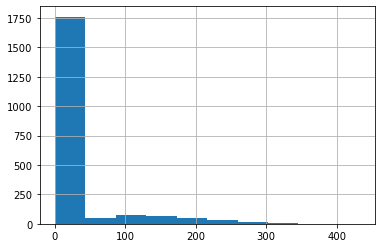

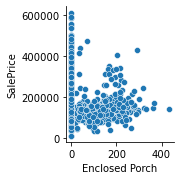

In [25]:
datacleaning('Enclosed Porch')

'3Ssn Porch' is examined below. This can be dropped. There are 2025 0 values with a low correlation. With a likely 5 variable regression model, this is dropped.

count    2051.000000
mean        2.591419
std        25.229615
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3Ssn Porch, dtype: float64
0
[  0 176 224 162 168 120 407 144 150 255 508 180 140  96 323 153  86 216
 245 182 290 304]
0      2025
153       3
168       3
144       2
216       1
323       1
255       1
245       1
508       1
304       1
290       1
224       1
182       1
86        1
180       1
176       1
162       1
150       1
140       1
120       1
96        1
407       1
Name: 3Ssn Porch, dtype: int64
count    878.000000
mean       2.597950
std       24.962482
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      360.000000
Name: 3Ssn Porch, dtype: float64
0
[  0 180 130 225 219 360 238  23 174 196 216 320]
0      867
23       1
130      1
174      1
180      1
196      1
216      1
219      1
225      1
238      1
320      1
360      1
Name: 3Ssn Porch, dtype: int64
Axe

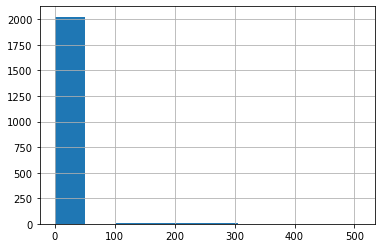

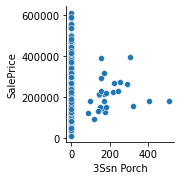

In [26]:
datacleaning('3Ssn Porch')

'Pool Area' is examined below. This can be dropped. There are 2042 0 values with a 
low correlation. With a likely 5 variable regression model, this is dropped. However, these houses are probably outliers that will lower R2 for the model.

count    2051.000000
mean        2.397855
std        37.782570
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool Area, dtype: float64
0
[  0 519 576 800 228 480 648 738 368 561]
0      2042
228       1
368       1
480       1
576       1
648       1
738       1
800       1
519       1
561       1
Name: Pool Area, dtype: int64
count    878.000000
mean       1.884966
std       29.916672
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      555.000000
Name: Pool Area, dtype: float64
0
[  0 144 555 512 444]
0      874
144      1
444      1
512      1
555      1
Name: Pool Area, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           Pool Area  SalePrice
Pool Area   1.000000   0.023106
SalePrice   0.023106   1.000000


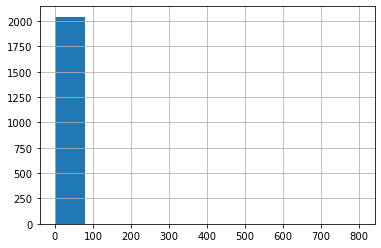

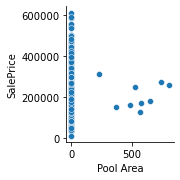

In [27]:
datacleaning('Pool Area')

'Misc Val' is examined below. This can be dropped. There are 1986 0 values with a low correlation. With a likely 5 variable regression model, this is dropped.

count     2051.000000
mean        51.574354
std        573.393985
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: Misc Val, dtype: float64
0
[    0   400   500  2000   650   600  1200   480   700   450  3000 12500
  4500   460  3500  8300   455   300  1150   900    54  6500   800  1500
  2500  1300 17000    80]
0        1986
400        12
500         8
600         6
2000        5
450         5
700         4
4500        2
2500        2
3000        2
1200        2
6500        1
900         1
1500        1
455         1
1300        1
1150        1
650         1
800         1
54          1
17000       1
480         1
460         1
300         1
12500       1
8300        1
80          1
3500        1
Name: Misc Val, dtype: int64
count      878.000000
mean        48.498861
std        550.169317
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: Misc Val, dtype:

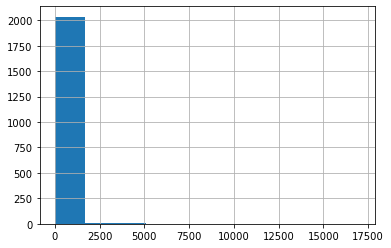

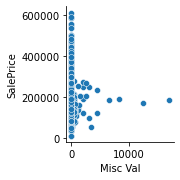

In [28]:
datacleaning('Misc Val') 

'Mo Sold' should have a value as more homes are sold in the summer than winter. However, it is impossible to tell in its current format. This variable was dummied to see if there was a high correlation with Sale Price. This was not seen for any month in the heatmap that is created if you scroll further down. It appears that there may be more homes sold in summer, but it does not effect price.

count    2051.000000
mean        6.219893
std         2.744736
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: Mo Sold, dtype: float64
0
[ 3  4  1  6  5  9  7  2 12 10 11  8]
6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: Mo Sold, dtype: int64
count    878.000000
mean       6.202733
std        2.642498
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       12.000000
Name: Mo Sold, dtype: float64
0
[ 4  8  9  7  6  5 10  1  2 11 12  3]
6     153
7     146
5     138
4      71
8      66
3      64
9      52
10     49
1      44
11     40
2      29
12     26
Name: Mo Sold, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Mo Sold  SalePrice
Mo Sold    1.000000   0.032735
SalePrice  0.032735   1.000000


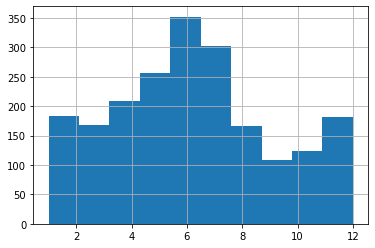

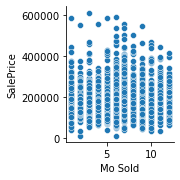

In [29]:
datacleaning('Mo Sold')
dftrain=pd.get_dummies(dftrain, prefix='Month', columns=['Mo Sold'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='Month', columns=['Mo Sold'], drop_first=True)

'Yr Sold' was examined. My thought was this should have an effect as the housing crisis and financial panic hit homeowners harshly in 2009 and 2010. I converted these to dummy variables for 2006-2010. The correlations were really low for the dummies, suggesting Ames was not as hard hit. This was excluded from the model.

count    2051.000000
mean     2007.775719
std         1.312014
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: Yr Sold, dtype: float64
0
[2010 2009 2006 2007 2008]
2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64
count     878.000000
mean     2007.825740
std         1.327861
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: Yr Sold, dtype: float64
0
[2006 2007 2009 2010 2008]
2009    202
2007    195
2006    187
2008    187
2010    107
Name: Yr Sold, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Yr Sold  SalePrice
Yr Sold    1.000000  -0.015203
SalePrice -0.015203   1.000000
count    2051.000000
mean        0.217455
std         0.412615
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Year_2009, dtype: float64
0
[0 1]
0    1605
1     446
Name: Year_2

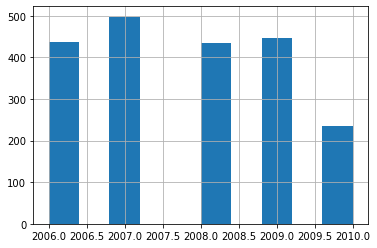

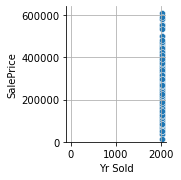

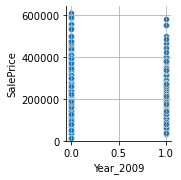

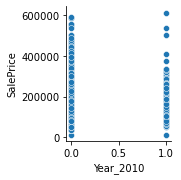

In [30]:
datacleaning('Yr Sold')
dftrain=pd.get_dummies(dftrain, prefix='Year', columns=['Yr Sold'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='Year', columns=['Yr Sold'], drop_first=True)
datacleaning('Year_2009')
datacleaning('Year_2010')

'Wood Deck SF' is examined. Correlation is .32 with Sale Price. Even with many homes without a deck, this may be indicative of a higher price. It is worth letting ridge and lasso take a look at.

count    2051.000000
mean       93.833740
std       128.549416
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: Wood Deck SF, dtype: float64
0
[   0  100  335  105  169  138  212  243  483  264  416  474  208  104
  256  736  216  303  431  200  379  168  132  496  280  158  142   49
  418  228  261  312  225  140  227  203  307  214  125  153   88  230
   50  276  144  421  187  122   52  156  204  344  240  160  193  114
  275   12  120  328  108  182   28  178   60  250   38  324  646  176
  248  112  306  143  302  257  146  409  224  232  192  136  441   48
  180  221  263   81  134  164  268  194  191   32  161   96  210  173
   90  106  172  393   63  196  246  288  385  237  205  188  242   30
   54  439  209   22  236  282   24   86  300  384  148  147  365  238
  201  370  327  521  184  298  315  371  128  211  218  270  390  133
  135  206  342  262  329   94  319  126  530  190   45   66  354  289
  382   84  19

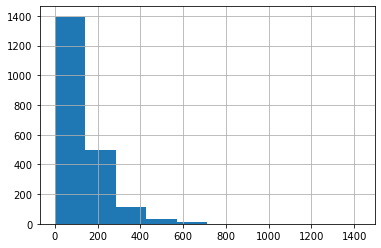

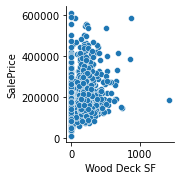

In [31]:
datacleaning('Wood Deck SF')

'Year Remod/Add' is examined. The correlation appears to be .55.  If there was no remodel, the data dictionary says the original construction date was used. So this confuses what this variable represents. Even homes with homes that are remodeled, older homes still tend to have more issues than newer homes. Year Built probably has more explanatory power(.57), and this definitely will created colinearity with Year Built. This one is excluded as .

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: Year Remod/Add, dtype: float64
0
[2005 1997 2007 1993 2002 2006 1959 1952 1969 1971 2000 1950 1963 1977
 2009 1968 1955 1961 1995 1981 1996 2008 1958 1973 1994 1965 1978 1954
 1960 2004 1970 1951 1975 1953 2001 2010 2003 1979 1964 1956 1972 1957
 1992 1962 1998 1990 1967 1985 1987 1988 1976 1984 1999 1966 1980 1989
 1991 1986 1982 1983 1974]
1950    262
2006    139
2007    123
2005    100
2004     83
       ... 
1952      9
2010      8
1983      7
1981      6
1982      3
Name: Year Remod/Add, Length: 61, dtype: int64
count     878.000000
mean     1984.417995
std        20.450725
min      1950.000000
25%      1967.000000
50%      1992.000000
75%      2003.000000
max      2010.000000
Name: Year Remod/Add, dtype: float64
0
[1950 1977 2006 1963 1972 1989 2004 1991 1992 1954 2000 1996 1956 1986
 2001 1961 1994 1969 2007

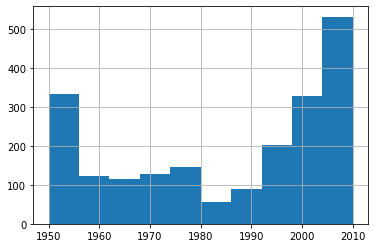

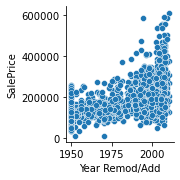

In [32]:
datacleaning('Year Remod/Add')

'Lot area' is examined. Generally speaking, this should have an effect but correlation is .29. The graph doesn't appear as though it has explanatory power. It is put in to let lasso and ridge determine its importance.

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: Lot Area, dtype: float64
0
[13517 11492  7922 ... 12444 11449  7558]
9600     34
7200     27
6000     26
10800    19
9000     18
         ..
7711      1
7697      1
9742      1
9738      1
8190      1
Name: Lot Area, Length: 1476, dtype: int64
count       878.000000
mean      10307.033030
std       10002.674602
min        1477.000000
25%        7297.250000
50%        9446.000000
75%       11589.000000
max      215245.000000
Name: Lot Area, dtype: float64
0
[  9142   9662  17104   8520   9500   1890   8516   9286   3515  10125
   7175   7200  11310   7976  11737   9060  10800   9571  17671   8246
   8499   8012  21453   9605   7180  12513   9000   8800   3500   7340
   6240  11700  10000  11166  13204   5520   8892   7321   3951  11214
   7388  14559   4054   1533  11250   7800   5868   7500   9439  

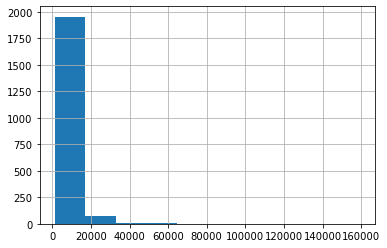

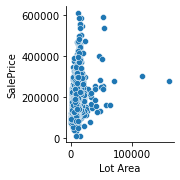

In [33]:
datacleaning('Lot Area')

'PID'  is simply identification. Any correlation is coincidental. This is excluded.

count    2.051000e+03
mean     7.135900e+08
std      1.886918e+08
min      5.263011e+08
25%      5.284581e+08
50%      5.354532e+08
75%      9.071801e+08
max      9.241520e+08
Name: PID, dtype: float64
0
[533352170 531379050 535304180 ... 909253010 535179160 527162130]
533250050    1
907410100    1
531385020    1
532376250    1
528235190    1
            ..
531451150    1
905201030    1
923252100    1
903456130    1
527450110    1
Name: PID, Length: 2051, dtype: int64
count    8.780000e+02
mean     7.162867e+08
std      1.889103e+08
min      5.263021e+08
25%      5.284841e+08
50%      5.354542e+08
75%      9.071904e+08
max      1.007100e+09
Name: PID, dtype: float64
0
[ 902301120  905108090  528218130  902207150  535105100  923228370
  902427150  907202130  533208090  914476010  531452100  903455140
  535303050  906230030  903206160  905480180  902128150  905451300
  535425040  902330040  905105070  532354160  531451020  906475050
  531363010  907227050  535150070  902125020  534425310

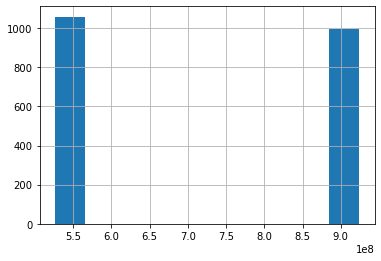

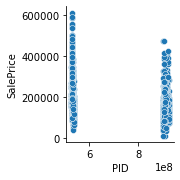

In [34]:
datacleaning('PID')

'MS Subclass' is examined. These are divided into types of homes, a nominal variable. I went ahead and dummied the variables to see if these classes made sense. The only one that had a high correlation was MS Subclass_60 which is included in the model.

count    2051.000000
mean       57.008776
std        42.824223
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MS SubClass, dtype: float64
0
[ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64
count    878.000000
mean      58.268793
std       42.235407
min       20.000000
25%       20.000000
50%       50.000000
75%       70.000000
max      190.000000
Name: MS SubClass, dtype: float64
0
[190  90  60  30  20 160 120  70  80  50  85  45  75 180  40]
20     309
60     180
50      89
120     60
160     41
30      38
70      38
90      34
80      32
85      20
190     15
45       7
75       7
180      6
40       2
Name: MS SubClass, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
             MS SubClass  Sale

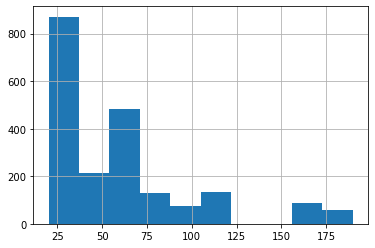

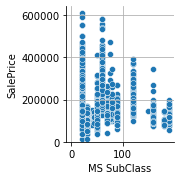

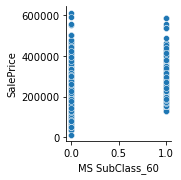

In [35]:
datacleaning('MS SubClass')
dftrain=pd.get_dummies(dftrain, prefix='MS SubClass', columns=['MS SubClass'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='MS SubClass', columns=['MS SubClass'], drop_first=True)
datacleaning('MS SubClass_60')

'Overall Qual' should be included  based on the graphs and high correlation. This appears to rate the homes on a 1-10 scale.

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64
0
[ 6  7  5  8 10  4  9  3  2  1]
5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64
count    878.000000
mean       6.050114
std        1.369065
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: Overall Qual, dtype: float64
0
[ 6  5  7  4  8  3  9 10  2]
5     262
6     226
7     171
8     100
4      67
9      30
3      11
10      7
2       4
Name: Overall Qual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
              Overall Qual  SalePrice
Overall Qual      1.000000   0.800207
SalePrice         0.800207   1.000000


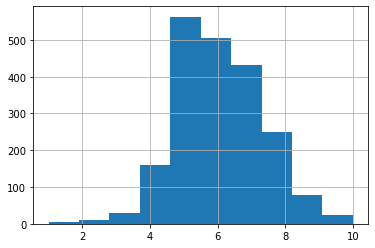

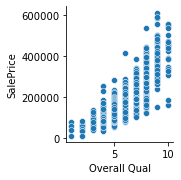

In [36]:
datacleaning('Overall Qual')

'Year Built' appears to have an effect at a correllation of .57. This essentially tells us the age of the home. As stated above, this is a better variable than year remodeled, which also names many values before in that variable as well.

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: Year Built, dtype: float64
0
[1976 1996 1953 2006 1900 1966 2005 1959 1952 1969 1971 1880 1999 2007
 2004 1916 1963 1977 2009 1968 2000 1992 1955 1961 1965 1937 1895 1949
 1981 1929 1995 1958 1973 1994 1978 1954 1935 1941 1931 2003 1928 1970
 1951 1920 1930 1924 1927 1960 1925 1910 2008 1915 1997 1956 1979 1964
 2001 1972 1957 1939 1962 1947 1940 1932 1967 1993 1875 1912 2010 1987
 1918 1988 1922 1926 1984 1942 1890 2002 1975 1998 1936 1938 1985 1923
 1948 1950 1980 1991 1917 1986 1946 1885 1914 1896 1983 1921 1945 1901
 1990 1974 1913 1905 1982 1919 1872 1892 1934 1879 1893 1898 1911 1908
 1989]
2005    102
2006     99
2007     78
2004     72
2003     64
       ... 
1898      1
1896      1
1892      1
1875      1
1872      1
Name: Year Built, Length: 113, dtype: int64
count     878.000000
mean     1970.492027
std 

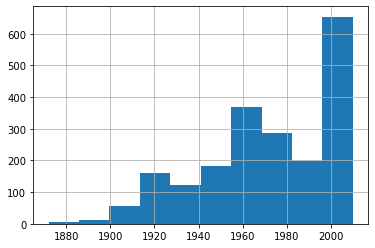

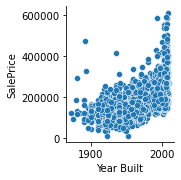

In [37]:
datacleaning('Year Built')

'Overall Cond' is examined. While this should have an effect, the  correllation is low. The graph conflicts with the correllation.  Given the number of variables already included, this is excluded.

count    2051.000000
mean        5.562165
std         1.104497
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Overall Cond, dtype: float64
0
[8 5 7 6 3 9 2 4 1]
5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64
count    878.000000
mean       5.566059
std        1.128903
min        1.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        9.000000
Name: Overall Cond, dtype: float64
0
[8 4 5 6 7 9 3 2 1]
5    485
6    165
7    120
8     43
4     31
3     15
9     12
2      4
1      3
Name: Overall Cond, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
              Overall Cond  SalePrice
Overall Cond      1.000000  -0.097019
SalePrice        -0.097019   1.000000


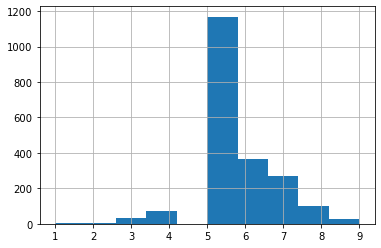

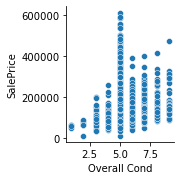

In [38]:
datacleaning('Overall Cond')

'Total Bsmt SF' is examined. It shows a strong correllation in its number and on the graph. There is one Nan. This data point is removed. DFTest has no Nans.  The variable is included.

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: Total Bsmt SF, dtype: float64
0
[ 725.  913. 1057.  384.  676. 1517.  547. 1188.  924. 1040.  483. 1208.
    0.  960. 1351. 1430.  624. 1121.  660.  756.  894. 1501. 1209. 1168.
 1056. 1453.  942.  957.  672. 2524.  792. 1494.  948. 1705.  160.  757.
 1844. 1242.  990. 1256. 2076. 1097. 1050.  608.  984.  776.  764. 1122.
 1392.  546.  216.  663.  600.  936.  916. 1152. 1184. 1420. 1382. 1120.
  531.  976. 1802. 1362. 1508. 1840.  655.  970. 1616.  768.  872.  520.
 1105.  616. 2216.  876.  864. 1189. 1666. 1176.  928. 1288. 1427.  860.
  754. 1141. 1138. 1561. 1342. 1884.  528. 1426.  245.  804. 1153.  673.
  714.  690.  978. 1078. 1116. 1140. 1466. 1614.  988.  996. 1202. 1008.
  720.  994.  707.  637.  813. 1055.  855. 1719.  780. 1554. 1528.  982.
 1172. 1642.  884. 1422.  985.  888. 1992. 1478.  930.  912. 132

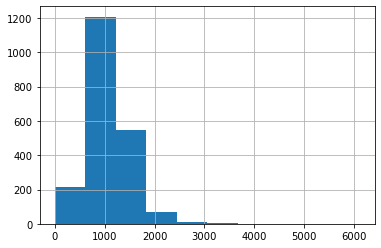

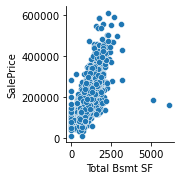

In [39]:
dftrain.dropna(subset=['Total Bsmt SF'], inplace=True)
datacleaning('Total Bsmt SF')

'BsmtFin SF 2' is examined below. It contains one Nan that could be dropped if necessary. However, correlation is low, and the graph does not show a relationship. This is not included.



count    2050.000000
mean       47.959024
std       165.000901
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFin SF 2, dtype: float64
0
[   0.  713.  117. 1057.  173.  290.  420.  469.   42.  955.  483.  147.
  596.  206.  382.  546.  202.  228.  661.  279.  106.  321.  232.  956.
  670.  915.  116. 1080.   80.  215.  144.  590.  149.  281.  297.  612.
  468.  891.  622.  507.  432.  852.  108.  128.  294. 1061.  127.  712.
  125.  324.  252.  247.   72.  150.  906.  555.   38.  180.   64.  288.
  311.  227.  842.  620.  181.  162.  354.  539.  551.  110.  219.  547.
  186.  774.  123.  613.  167.  230.  495.  208.  308.  604.  154.  334.
  417.  624.  442.  497.  211. 1474.  532.  132.  829. 1127.  435.  174.
  105.  375.  608. 1039. 1063.  264.  270.  259.  531.  488.  500.   41.
  177.  169.  344.  869.  182.  768.  119.  619.  345.  645.  278.  113.
  466.  522.    6.  377.   92.  859.  479.  239. 1083. 1085.  441

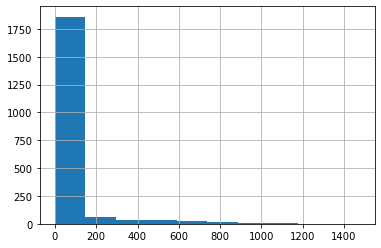

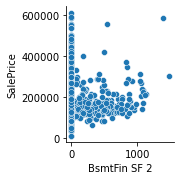

In [40]:
datacleaning('BsmtFin SF 2')  

'Garage Cars' has high correlation even though the graph does not show a linear relationship.  While it was initially included, there is better garage variable, Garage Area, that is included. There was one NAN, which was dropped.

count    2049.000000
mean        1.776964
std         0.764531
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: Garage Cars, dtype: float64
0
[2. 1. 3. 0. 4. 5.]
2.0    1136
1.0     523
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64
count    878.000000
mean       1.742597
std        0.750391
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Garage Cars, dtype: float64
0
[1 2 4 0 3]
2    467
1    254
3    110
0     44
4      3
Name: Garage Cars, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
             Garage Cars  SalePrice
Garage Cars     1.000000   0.648007
SalePrice       0.648007   1.000000


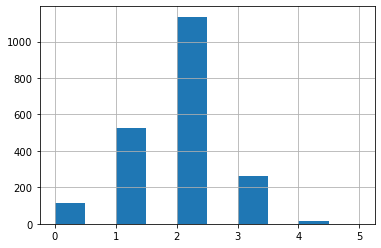

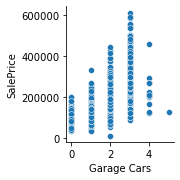

In [41]:
dftrain.dropna(subset=['Garage Cars'], inplace=True)
datacleaning('Garage Cars') 


'BsmtFin SF 1' is examined. This variable has colinearity with 'Total Bsmt SF.' The latter is a better variable as it covers a wider swath of variation.  Below the table compares the two variables with Sale Price. The latter is better. Moreover, given the 2000 observations, this may be a 5 variable model. A multiplication of the two variables for feature interaction doesnot seem useful in this context. 'Total Bsmt SF' is kept while the other is excluded.

               BsmtFin SF 1  Total Bsmt SF  SalePrice
BsmtFin SF 1       1.000000       0.539081   0.423583
Total Bsmt SF      0.539081       1.000000   0.628894
SalePrice          0.423583       0.628894   1.000000
count    2049.000000
mean      442.248902
std       461.310793
min         0.000000
25%         0.000000
50%       368.000000
75%       734.000000
max      5644.000000
Name: BsmtFin SF 1, dtype: float64
0
[5.330e+02 6.370e+02 7.310e+02 0.000e+00 2.470e+02 5.470e+02 1.000e+03
 2.920e+02 6.500e+02 3.870e+02 3.930e+02 8.130e+02 2.400e+01 6.510e+02
 4.920e+02 1.158e+03 9.350e+02 1.056e+03 1.312e+03 5.530e+02 6.060e+02
 1.104e+03 4.370e+02 4.410e+02 1.288e+03 5.480e+02 7.050e+02 9.160e+02
 4.200e+02 8.300e+02 1.386e+03 1.097e+03 9.060e+02 2.100e+02 4.080e+02
 3.540e+02 3.530e+02 6.220e+02 7.900e+02 1.760e+02 3.710e+02 3.680e+02
 4.860e+02 8.500e+01 1.380e+02 5.240e+02 6.400e+01 1.092e+03 3.600e+02
 1.720e+02 2.060e+02 2.460e+02 1.600e+01 1.346e+03 7.000e+02 6.550e+02
 4.430e+02 

              BsmtFin SF 1  SalePrice
BsmtFin SF 1      1.000000   0.423583
SalePrice         0.423583   1.000000


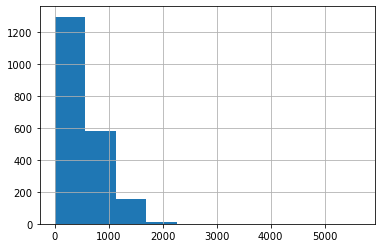

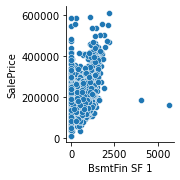

In [42]:
print(dftrain[['BsmtFin SF 1', 'Total Bsmt SF', 'SalePrice']].corr())
datacleaning('BsmtFin SF 1')

'Bsmt Full Bath' is examined below. This variable has colinearity with 'Total Bsmt SF.' The latter is a better variable as it covers a wider swath of variation.  Below the table compares the two variables with Sale Price. The latter is better. Moreover, given the 2000 observations, this may be a 5 variable model. A multiplication of the two variables for feature interaction doesnot seem useful in this context. 'Total Bsmt SF' is kept while the other is excluded.

                Bsmt Full Bath  Total Bsmt SF  SalePrice
Bsmt Full Bath        1.000000       0.321263   0.283564
Total Bsmt SF         0.321263       1.000000   0.628894
SalePrice             0.283564       0.628894   1.000000
count    2048.000000
mean        0.427734
std         0.522715
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt Full Bath, dtype: float64
1
[ 0.  1.  2. nan  3.]
0.0    1199
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64
count    878.000000
mean       0.439636
std        0.529948
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Bsmt Full Bath, dtype: float64
0
[0 1 2]
0    507
1    356
2     15
Name: Bsmt Full Bath, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
                Bsmt Full Bath  SalePrice
Bsmt Full Bath        1.000000   0.283564
SalePrice             0.283564   1.000000


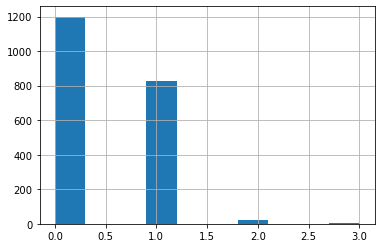

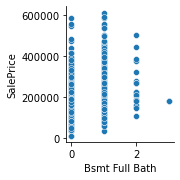

In [43]:
print(dftrain[['Bsmt Full Bath', 'Total Bsmt SF', 'SalePrice']].corr())

datacleaning('Bsmt Full Bath')  

'Bsmt Unf SF' is examined below. This variable has colinearity with 'Total Bsmt SF.' The latter is a better variable as it covers a wider swath of variation. Below the table compares the two variables with Sale Price. The latter is better. Moreover, given the 2000 observations, this may be a 5 variable model. A multiplication of the two variables for feature interaction doesnot seem useful in this context. 'Total Bsmt SF' is kept while the other is excluded.

               Bsmt Unf SF  Total Bsmt SF  SalePrice
Bsmt Unf SF       1.000000       0.419168   0.190123
Total Bsmt SF     0.419168       1.000000   0.628894
SalePrice         0.190123       0.628894   1.000000
count    2049.000000
mean      567.853587
std       445.027230
min         0.000000
25%       220.000000
50%       475.000000
75%       811.000000
max      2336.000000
Name: Bsmt Unf SF, dtype: float64
0
[ 192.  276.  326.  384.  676.  557.    0.  188.  632.  390.   96.  815.
  147. 1327. 1430.  624.  470.  660.  732.  402.  343. 1209.  233.  141.
  224.  336.  957.  672. 1420.  792.  507.  417.  160.   36. 1139.  570.
  136.  690. 1050.  134.  398.  156.  776.  412.  764.  403.  500.  133.
  370.  216.  292.  190.  450.  778.  628. 1120.  328.  576.  727.  914.
  285.  976. 1802. 1346.  162. 1140.  970. 1616.  768.  872.  520.  662.
  936.  448.  312.  876.  325. 1251.  551.  588.  320.  599.   98.  122.
  138. 1081.  550.  250.  408.  547.  180.  245.  114.  191.   32.  595.


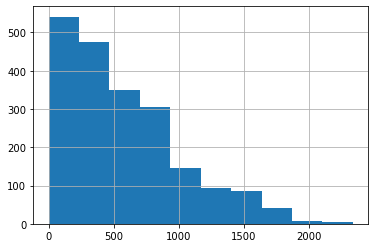

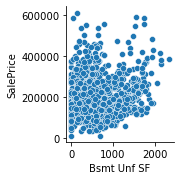

In [44]:
print(dftrain[['Bsmt Unf SF', 'Total Bsmt SF', 'SalePrice']].corr()) 
datacleaning('Bsmt Unf SF')

'Lot Frontage' is examined below. The graph makes it look like a blob, suggesting no linear relationship. Even with a .34 corr, this is left out.

count    1719.000000
mean       69.048866
std        23.258429
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64
330
[ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]
60.0     179
70.0      96
80.0      94
50.0      89
65.0      71
        ... 
119.0      1
117.0      1
137.0      1
22.0       1
195.0      1
Name: Lot Frontage, Length: 118, dtype: int64

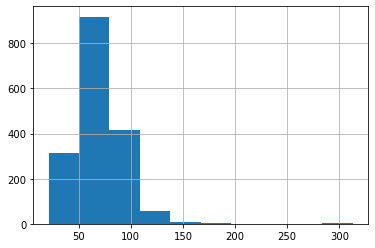

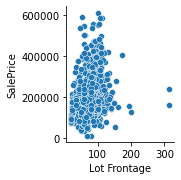

In [45]:
datacleaning('Lot Frontage')

'Garage Yr Blt' is examined below. This variable has colinearity with 'Year Built' and 'Garage Area.' The latter is a better variable as it covers a wider swath of variation.  Moreover, given the 2000 observations, this may be a 5 variable model. A multiplication of the two variables for feature interaction doesnot seem useful in this context. 'Garage Area' is kept while the other is excluded.

count    1936.000000
mean     1978.724690
std        25.436797
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64
113
[1976. 1997. 1953. 2007. 1957. 1966. 2005. 1959. 1952. 1969. 1971. 1900.
 2000. 2004. 1916. 1963. 1977. 2009. 1968. 1992. 1955. 1961. 1973. 1937.
   nan 2003. 1981. 1931. 1995. 1958. 1965. 2006. 1978. 1954. 1935. 1951.
 1996. 1999. 1920. 1930. 1924. 1960. 1949. 1986. 1956. 1994. 1979. 1964.
 2001. 1972. 1939. 1962. 1927. 1948. 1967. 1993. 2010. 1915. 1987. 1970.
 1988. 1982. 1941. 1984. 1942. 1950. 2002. 1975. 2008. 1974. 1998. 1918.
 1938. 1985. 1923. 1980. 1991. 1946. 1940. 1990. 1896. 1983. 1914. 1945.
 1921. 1925. 1926. 1936. 1932. 1947. 1929. 1910. 1917. 1922. 1934. 1989.
 1928. 2207. 1933. 1895. 1919.]
2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
         ... 
1919.0      1
1896.0      1
1895.0      1
1917.0      1
1933.0      1
Name: Garage Yr Blt, L

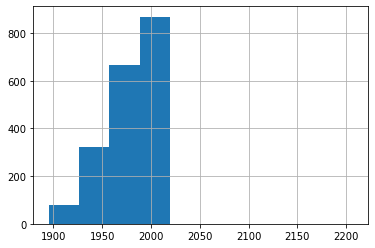

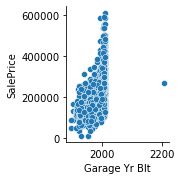

In [46]:
datacleaning('Garage Yr Blt')

'Mas Vnr Area' and 'Mas Vnr Type' are examined. There were Nans in the former. The median was used to impute the value given the distribution. The mean would artificially skew it. This has a .50 correlation so it is included.
'Mas Vnr Type' could not be examined in its present formation so it was dummied. The heatmap indicates its usefulness.

count    2049.000000
mean       98.722792
std       174.382527
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: Mas Vnr Area, dtype: float64
0
[2.890e+02 1.320e+02 0.000e+00 8.200e+01 1.800e+02 1.920e+02 2.320e+02
 4.560e+02 1.480e+02 3.000e+00 3.360e+02 4.800e+02 3.200e+02 1.040e+02
 3.350e+02 4.000e+01 1.100e+02 1.060e+02 5.130e+02 1.840e+02 5.220e+02
 1.430e+02 3.480e+02 1.170e+02 5.100e+02 1.450e+02 9.600e+01 6.680e+02
 5.000e+01 2.280e+02 6.500e+01 3.610e+02 7.480e+02 1.970e+02 5.720e+02
 1.280e+02 1.200e+02 2.540e+02 8.600e+01 3.000e+01 5.400e+01 2.460e+02
 3.970e+02 2.960e+02 1.440e+02 9.020e+02 2.610e+02 2.600e+02 2.750e+02
 5.700e+01 1.050e+03 3.590e+02 1.080e+02 6.620e+02 5.000e+02 2.100e+02
 1.650e+02 2.080e+02 3.600e+02 1.600e+02 6.400e+01 2.240e+02 2.060e+02
 1.160e+02 6.510e+02 5.040e+02 2.520e+02 3.370e+02 8.400e+01 3.090e+02
 4.660e+02 6.000e+02 1.890e+02 3.680e+02 1.980e+02 1.400e+02 9.220e+02
 1.600e+01 1.8

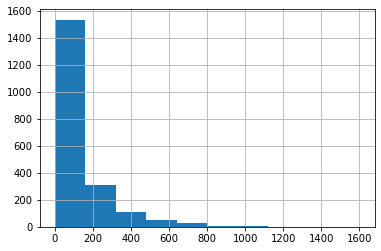

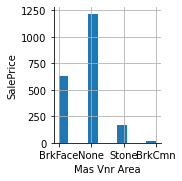

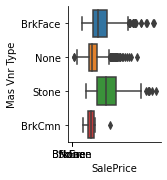

In [47]:
dftrain['Mas Vnr Area']=dftrain['Mas Vnr Area'].fillna(dftrain['Mas Vnr Area'].median())
dftest['Mas Vnr Area']=dftest['Mas Vnr Area'].fillna(dftest['Mas Vnr Area'].median())
datacleaning('Mas Vnr Area')
datacleaningbox('Mas Vnr Type')
dftrain=pd.get_dummies(dftrain, prefix='Masonry Type', columns=['Mas Vnr Type'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='Masonry Type', columns=['Mas Vnr Type'], drop_first=True)

count    2048.000000
mean        0.063477
std         0.251763
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Bsmt Half Bath, dtype: float64
1
[ 0.  1. nan  2.]
0.0    1922
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64
count    878.000000
mean       0.055809
std        0.229683
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Bsmt Half Bath, dtype: float64
0
[0 1]
0    829
1     49
Name: Bsmt Half Bath, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
                Bsmt Half Bath  SalePrice
Bsmt Half Bath        1.000000  -0.045378
SalePrice            -0.045378   1.000000


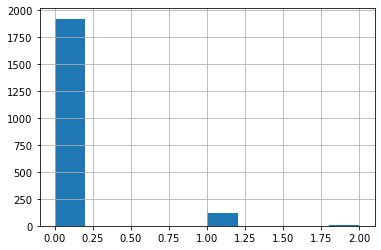

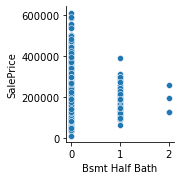

In [48]:
datacleaning('Bsmt Half Bath')#low correlation-doesn't look useful

'Garage Area' is examined. It appears that Garage Area is a better variable than Garage Cars so this one is included. There was no multiplication for feature interaction as this dataset has only 2000 observations, meaning the model will be small.



count    2049.000000
mean      473.766227
std       215.944850
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: Garage Area, dtype: float64
0
[ 475.  559.  246.  400.  484.  578.  525.  531.  420.  504.  264.  632.
  576.  480.  610.  624.  513.  528.  614.  450.  499.  575.  572.  530.
  336.  240.    0.  542.  481.  410.  826.  384.  546.  276.  850.  602.
  352.  786.  660.  270.  280.  474.  440.  564.  299.  293.  386.  671.
  550.  690.  225.  350.  216.  380.  843.  539.  834.  322. 1166.  720.
  392.  555.  252.  502.  516.  608.  495.  396.  556.  725.  670.  560.
  501.  490.  286.  360.  479.  626.  470.  304.  864.  403.  579.  288.
  473.  627.  758.  431.  260.  366.  852.  672.  486.  656.  716.  442.
  297.  388.  461.  447.  619.  308.  506.  319.  676.  312.  478.  342.
  393.  983.  923.  487.  543.  453.  541.  754.  666.  529.  714.  968.
  788.  812.  600.  483.  300.  430.  230.  505.  368.  618.  402.

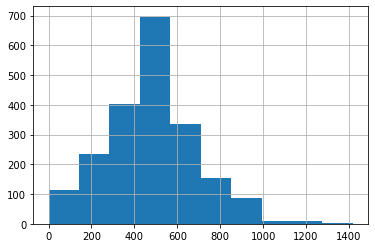

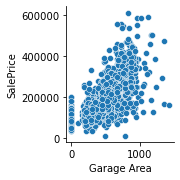

In [49]:
datacleaning('Garage Area')

count    2049.000000
mean      567.853587
std       445.027230
min         0.000000
25%       220.000000
50%       475.000000
75%       811.000000
max      2336.000000
Name: Bsmt Unf SF, dtype: float64
0
[ 192.  276.  326.  384.  676.  557.    0.  188.  632.  390.   96.  815.
  147. 1327. 1430.  624.  470.  660.  732.  402.  343. 1209.  233.  141.
  224.  336.  957.  672. 1420.  792.  507.  417.  160.   36. 1139.  570.
  136.  690. 1050.  134.  398.  156.  776.  412.  764.  403.  500.  133.
  370.  216.  292.  190.  450.  778.  628. 1120.  328.  576.  727.  914.
  285.  976. 1802. 1346.  162. 1140.  970. 1616.  768.  872.  520.  662.
  936.  448.  312.  876.  325. 1251.  551.  588.  320.  599.   98.  122.
  138. 1081.  550.  250.  408.  547.  180.  245.  114.  191.   32.  595.
  269.  978. 1078. 1116.  308. 1290.  587.  107.  706.  565.  161. 1008.
  584.  707.  637.  113.  367.  677.  466.  100.  396.   25.  780. 1530.
 1528.  744.  381.  218.  610.  459.  606.  144.  888.  220. 1752.

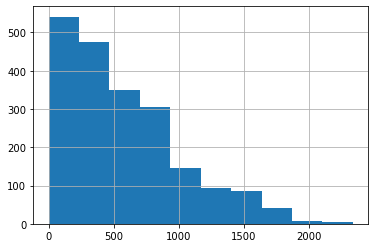

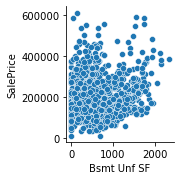

In [50]:
datacleaning('Bsmt Unf SF') #low correlation-graph blob-excluded

'Sale Type' is examined. This was dummied. Given that 1781 observations are WD and that 400 rows per feature is a rule of thumb, this does not strike me as worth including. However, I wanted to see the heatmap after the dummy.

count     2049
unique       9
top        WD 
freq      1780
Name: Sale Type, dtype: object
0
['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']
WD       1780
New       160
COD        63
ConLD      16
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: Sale Type, dtype: int64
count     878
unique     10
top       WD 
freq      755
Name: Sale Type, dtype: object
0
['WD ' 'New' 'Con' 'COD' 'VWD' 'CWD' 'ConLD' 'ConLI' 'Oth' 'ConLw']
WD       755
New       78
COD       24
ConLD      9
Oth        3
ConLw      3
ConLI      2
CWD        2
VWD        1
Con        1
Name: Sale Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


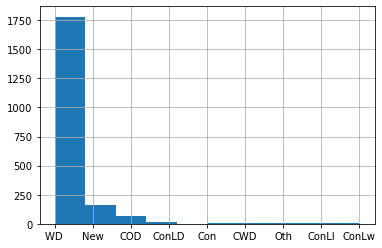

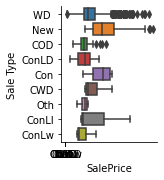

In [51]:
datacleaningbox('Sale Type') 
dftrain=pd.get_dummies(dftrain, prefix='Sale Type', columns=['Sale Type'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='Sale Type', columns=['Sale Type'], drop_first=True)

'House Style' was examined. This was dummied as it is a type. The heatmap indicates its usefulness

count       2049
unique         8
top       1Story
freq        1058
Name: House Style, dtype: object
0
['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
1Story    1058
2Story     597
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64
count        878
unique         8
top       1Story
freq         422
Name: House Style, dtype: object
0
['2Story' '1Story' '1.5Fin' 'SLvl' 'SFoyer' '2.5Fin' '2.5Unf' '1.5Unf']
1Story    422
2Story    274
1.5Fin     96
SLvl       34
SFoyer     33
2.5Unf     10
1.5Unf      7
2.5Fin      2
Name: House Style, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


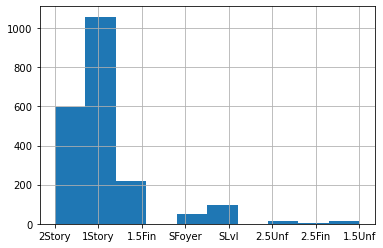

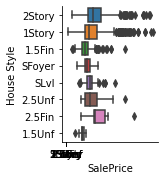

In [52]:
datacleaningbox('House Style')
dftrain=pd.get_dummies(dftrain, prefix='House Style', columns=['House Style'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='House Style', columns=['House Style'], drop_first=True)

count       65
unique       5
top       Shed
freq        56
Name: Misc Feature, dtype: object
1984
[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64
count       41
unique       3
top       Shed
freq        39
Name: Misc Feature, dtype: object
837
[nan 'Shed' 'Othr' 'Gar2']
Shed    39
Othr     1
Gar2     1
Name: Misc Feature, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


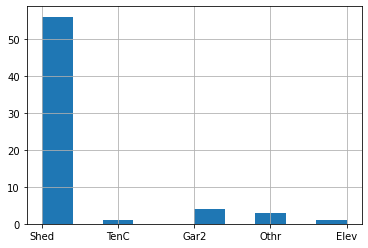

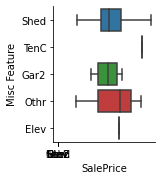

In [53]:
datacleaningbox('Misc Feature')  #Too many missing points, NaN's

'Bldg Type' is examine. One category dominates. It does not look as though it makes a difference based on the boxplot.

count     2049
unique       5
top       1Fam
freq      1698
Name: Bldg Type, dtype: object
0
['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
1Fam      1698
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64
count      878
unique       5
top       1Fam
freq       724
Name: Bldg Type, dtype: object
0
['2fmCon' 'Duplex' '1Fam' 'TwnhsE' 'Twnhs']
1Fam      724
TwnhsE     72
Duplex     34
Twnhs      32
2fmCon     16
Name: Bldg Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


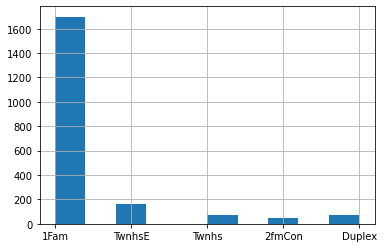

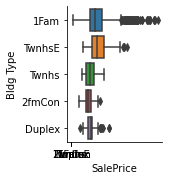

In [54]:
datacleaningbox('Bldg Type')  

Condition 1 is examined. Based on the data dictionary and that the vast numbers of these are normal, I haven't dummied this variable. Again given only about 2000 observations, everything cannot be included without overfitting the model.

count     2049
unique       9
top       Norm
freq      1766
Name: Condition 1, dtype: object
0
['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
Norm      1766
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64
count      878
unique       9
top       Norm
freq       755
Name: Condition 1, dtype: object
0
['Norm' 'Feedr' 'Artery' 'PosA' 'RRAn' 'RRNn' 'RRAe' 'RRNe' 'PosN']
Norm      755
Feedr      55
Artery     22
RRAn       14
PosN       11
PosA        8
RRAe        7
RRNe        3
RRNn        3
Name: Condition 1, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


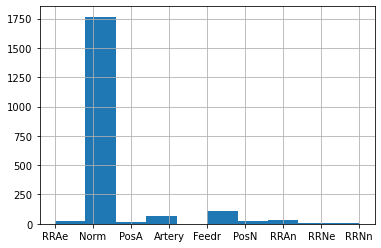

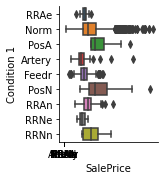

In [55]:
datacleaningbox('Condition 1')  

Condition 2 is examined. Given that 2024 of 2050 are normal, it does not appear to make a difference.  Again too few observations.

count     2049
unique       8
top       Norm
freq      2023
Name: Condition 2, dtype: object
0
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
Norm      2023
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition 2, dtype: int64
count      878
unique       3
top       Norm
freq       875
Name: Condition 2, dtype: object
0
['Norm' 'Feedr' 'PosA']
Norm     875
Feedr      2
PosA       1
Name: Condition 2, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


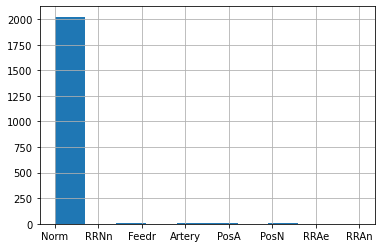

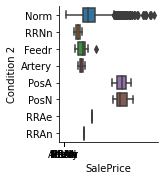

In [56]:
datacleaningbox('Condition 2') 

Garage Finish is examined. There is already Garage Area includedd. This seems like a minor detail-the number of features already included makes this prohibitive.

count     1936
unique       3
top        Unf
freq       848
Name: Garage Finish, dtype: object
113
['RFn' 'Unf' 'Fin' nan]
Unf    848
RFn    579
Fin    509
Name: Garage Finish, dtype: int64
count     833
unique      3
top       Unf
freq      382
Name: Garage Finish, dtype: object
45
['Unf' 'Fin' 'RFn' nan]
Unf    382
RFn    233
Fin    218
Name: Garage Finish, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


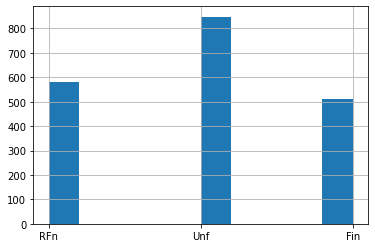

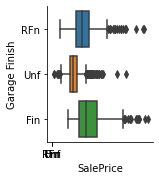

In [57]:
datacleaningbox('Garage Finish') 

'Land Contour' is examined. The flatness of the property seems minor and most are the same, 1841. The number of observations make this prohibitive as a feature-Excluded

count     2049
unique       4
top        Lvl
freq      1841
Name: Land Contour, dtype: object
0
['Lvl' 'HLS' 'Bnk' 'Low']
Lvl    1841
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64
count     878
unique      4
top       Lvl
freq      790
Name: Land Contour, dtype: object
0
['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    790
Bnk     36
HLS     35
Low     17
Name: Land Contour, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


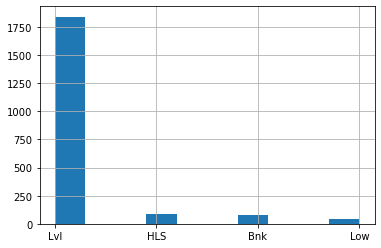

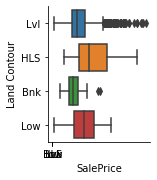

In [58]:
datacleaningbox('Land Contour') 

'Land Slope' is examined. There are 1951 out of 2049 observations with the same value. This seems prohibitive given the number of observations.

count     2049
unique       3
top        Gtl
freq      1951
Name: Land Slope, dtype: object
0
['Gtl' 'Sev' 'Mod']
Gtl    1951
Mod      88
Sev      10
Name: Land Slope, dtype: int64
count     878
unique      3
top       Gtl
freq      835
Name: Land Slope, dtype: object
0
['Gtl' 'Mod' 'Sev']
Gtl    835
Mod     37
Sev      6
Name: Land Slope, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


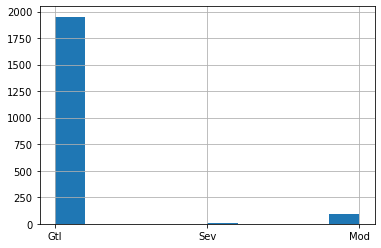

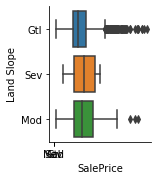

In [59]:
datacleaningbox('Land Slope') 

'Utilities' is examined. There are only 2 non all utility observations;it is excluded.

count       2049
unique         3
top       AllPub
freq        2047
Name: Utilities, dtype: object
0
['AllPub' 'NoSeWa' 'NoSewr']
AllPub    2047
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64
count        878
unique         2
top       AllPub
freq         877
Name: Utilities, dtype: object
0
['AllPub' 'NoSewr']
AllPub    877
NoSewr      1
Name: Utilities, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


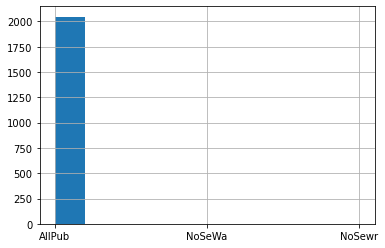

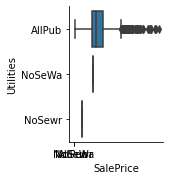

In [60]:
datacleaningbox('Utilities')  

'Lot Config' is examined. I think this is one to dummy to include. There appears to be variation. The heatmap shall tell the rest.

count       2049
unique         5
top       Inside
freq        1502
Name: Lot Config, dtype: object
0
['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
Inside     1502
Corner      348
CulDSac     131
FR2          60
FR3           8
Name: Lot Config, dtype: int64
count        878
unique         5
top       Inside
freq         636
Name: Lot Config, dtype: object
0
['Inside' 'CulDSac' 'Corner' 'FR2' 'FR3']
Inside     636
Corner     163
CulDSac     49
FR2         25
FR3          5
Name: Lot Config, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


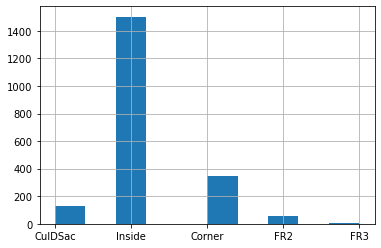

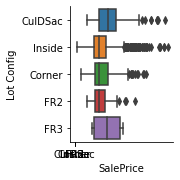

In [61]:
datacleaningbox('Lot Config')  
dftrain=pd.get_dummies(dftrain, prefix='lot', columns=['Lot Config'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='lot', columns=['Lot Config'], drop_first=True)

'Fence' is examined. We are missing way too much of the data(1651 points). This is not included.

count       398
unique        4
top       MnPrv
freq        225
Name: Fence, dtype: object
1651
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
MnPrv    225
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64
count       172
unique        4
top       MnPrv
freq        103
Name: Fence, dtype: object
706
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


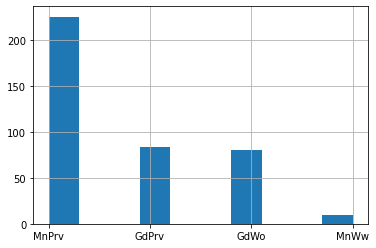

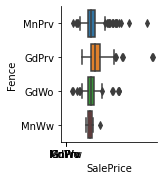

In [62]:
datacleaningbox('Fence') 

'Lot Shape' is examined. The distribution looks fairly similar to the above variable. Too many are just normal.

count     2049
unique       4
top        Reg
freq      1294
Name: Lot Shape, dtype: object
0
['IR1' 'Reg' 'IR2' 'IR3']
Reg    1294
IR1     691
IR2      55
IR3       9
Name: Lot Shape, dtype: int64
count     878
unique      4
top       Reg
freq      564
Name: Lot Shape, dtype: object
0
['Reg' 'IR1' 'IR3' 'IR2']
Reg    564
IR1    286
IR2     21
IR3      7
Name: Lot Shape, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


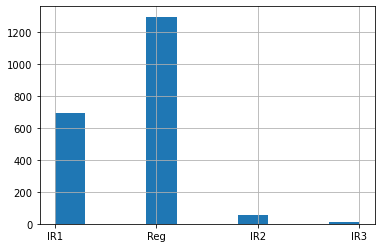

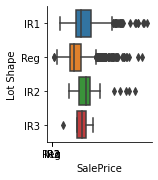

In [63]:
datacleaningbox('Lot Shape') 

count      140
unique       2
top       Grvl
freq        85
Name: Alley, dtype: object
1909
[nan 'Pave' 'Grvl']
Grvl    85
Pave    55
Name: Alley, dtype: int64
count       58
unique       2
top       Grvl
freq        35
Name: Alley, dtype: object
820
['Grvl' nan 'Pave']
Grvl    35
Pave    23
Name: Alley, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


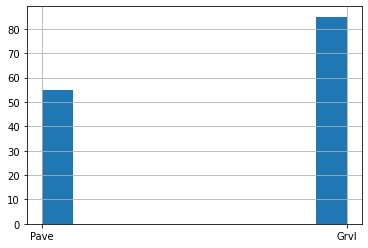

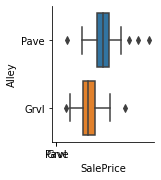

In [64]:
datacleaningbox('Alley')  #Too much missing data

count     2049
unique       2
top       Pave
freq      2042
Name: Street, dtype: object
0
['Pave' 'Grvl']
Pave    2042
Grvl       7
Name: Street, dtype: int64
count      878
unique       2
top       Pave
freq       873
Name: Street, dtype: object
0
['Pave' 'Grvl']
Pave    873
Grvl      5
Name: Street, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


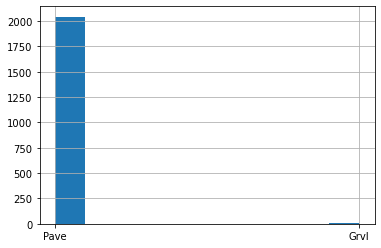

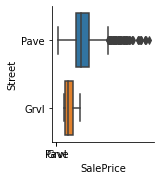

In [65]:
datacleaningbox('Street')  #Only 7 aren't paved--excluded

'MS Zoning' is examined. Given that 1598 are the same, adding this feature seems to be a luxury.

count     2049
unique       7
top         RL
freq      1598
Name: MS Zoning, dtype: object
0
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
RL         1598
RM          314
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
count     878
unique      6
top        RL
freq      674
Name: MS Zoning, dtype: object
0
['RM' 'RL' 'FV' 'RH' 'C (all)' 'I (all)']
RL         674
RM         146
FV          38
RH          13
C (all)      6
I (all)      1
Name: MS Zoning, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


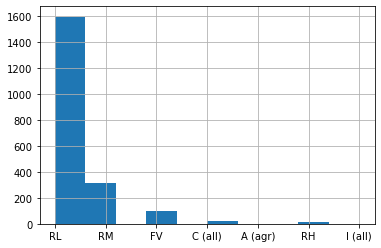

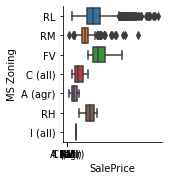

In [66]:
datacleaningbox('MS Zoning')  

'Neighborhood' is examined. 
This is dummied to see if the neighborhood makes a difference. For one neighborhood, it makes a difference.

count      2049
unique       28
top       NAmes
freq        310
Name: Neighborhood, dtype: object
0
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     75
Crawfor     71
IDOTRR      68
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64
count       878
unique       26
top       NAmes
freq        133
Name: Neighborhood, dtype: object
0
['OldTown' 'Sawyer' 'Gilbert' 'NAmes' 'MeadowV' 'CollgCr' 'Somerst'
 'Mi

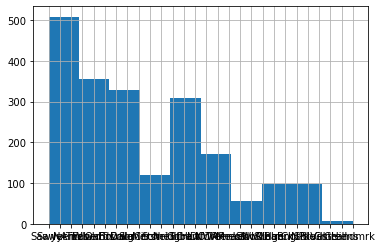

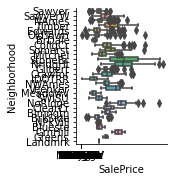

In [67]:
datacleaningbox('Neighborhood')  
dftrain=pd.get_dummies(dftrain, prefix='neighborhood', columns=['Neighborhood'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='neighborhood', columns=['Neighborhood'], drop_first=True)

'Roof Style' is examined. One type dominates. It is excluded

count      2049
unique        6
top       Gable
freq       1617
Name: Roof Style, dtype: object
0
['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
Gable      1617
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64
count       878
unique        6
top       Gable
freq        702
Name: Roof Style, dtype: object
0
['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
Gable      702
Hip        153
Gambrel     10
Flat         7
Mansard      4
Shed         2
Name: Roof Style, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


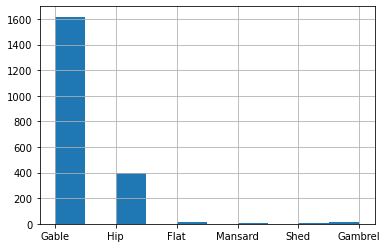

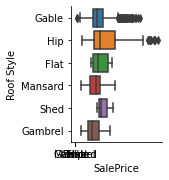

In [68]:
datacleaningbox('Roof Style') 

'Bsmt Qual' is examined. From a common sense persepctive, the height of the basement does not seems to be an explainer in as long as it is within a normal amoount. Here all but 61 are fine. Moreover, basement total square feet is a better explainer.

count     1995
unique       5
top         TA
freq       887
Name: Bsmt Qual, dtype: object
54
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
TA    887
Gd    863
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64
count     853
unique      5
top        TA
freq      396
Name: Bsmt Qual, dtype: object
25
['Fa' 'Gd' 'TA' 'Ex' nan 'Po']
TA    396
Gd    355
Ex     73
Fa     28
Po      1
Name: Bsmt Qual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


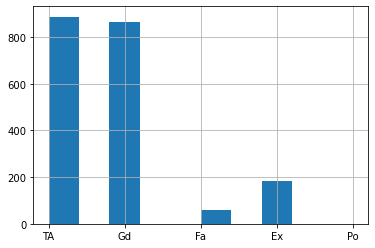

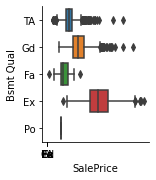

In [69]:
datacleaningbox('Bsmt Qual')  

'Exterior 1st' is examined. This detail does not seem worth including given the number of existing features.

count        2049
unique         15
top       VinylSd
freq          724
Name: Exterior 1st, dtype: object
0
['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng'
 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'CBlock' 'ImStucc'
 'AsphShn']
VinylSd    724
MetalSd    330
HdBoard    300
Wd Sdng    275
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
CBlock       2
Stone        2
AsphShn      1
ImStucc      1
Name: Exterior 1st, dtype: int64
count         878
unique         13
top       VinylSd
freq          302
Name: Exterior 1st, dtype: object
0
['AsbShng' 'Plywood' 'VinylSd' 'Wd Sdng' 'CemntBd' 'MetalSd' 'HdBoard'
 'BrkComm' 'Stucco' 'WdShing' 'BrkFace' 'PreCast' 'AsphShn']
VinylSd    302
Wd Sdng    144
HdBoard    142
MetalSd    119
Plywood     69
CemntBd     35
BrkFace     24
Stucco      16
AsbShng     11
WdShing     11
BrkComm      3
AsphShn      1
PreCast      1
Name: Exterior 1st, dtype: int64
AxesSubplot(0.12

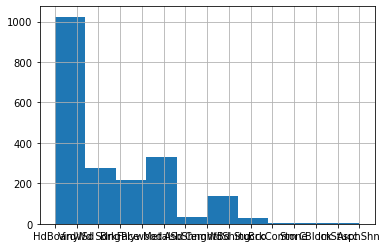

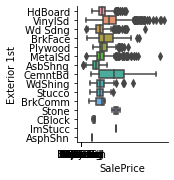

In [70]:
datacleaningbox('Exterior 1st') 

'Fireplace Qu' is examined. Most of the values are na or within two categories. excluded

count     1051
unique       5
top         Gd
freq       523
Name: Fireplace Qu, dtype: object
998
[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64
count     456
unique      5
top        Gd
freq      220
Name: Fireplace Qu, dtype: object
422
[nan 'Gd' 'Fa' 'TA' 'Po' 'Ex']
Gd    220
TA    193
Fa     16
Po     15
Ex     12
Name: Fireplace Qu, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


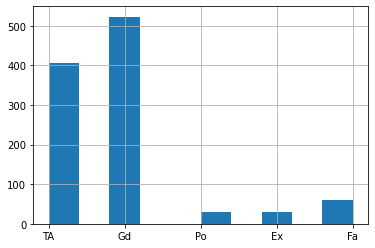

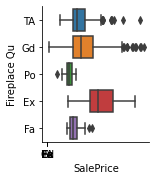

In [71]:
datacleaningbox('Fireplace Qu')

count     1936
unique       5
top         TA
freq      1831
Name: Garage Qual, dtype: object
113
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
TA    1831
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64
count     833
unique      4
top        TA
freq      782
Name: Garage Qual, dtype: object
45
['Po' 'TA' 'Fa' nan 'Gd']
TA    782
Fa     42
Gd      6
Po      3
Name: Garage Qual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


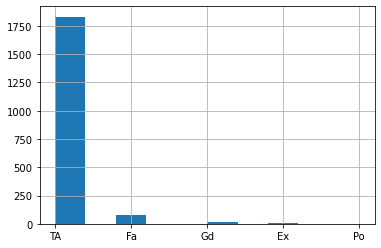

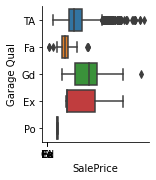

In [72]:
datacleaningbox('Garage Qual') #1831 were typical. Excluded

'Functional' is examined. 1914 are typical. Given limited features, I don't think this will help

count     2049
unique       8
top        Typ
freq      1913
Name: Functional, dtype: object
0
['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
Typ     1913
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64
count     878
unique      6
top       Typ
freq      812
Name: Functional, dtype: object
0
['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Maj2']
Typ     812
Min2     28
Min1     23
Maj1      7
Mod       6
Maj2      2
Name: Functional, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


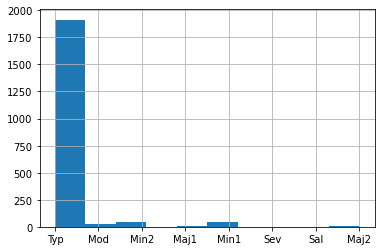

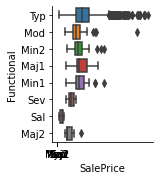

In [73]:
datacleaningbox('Functional')  

'Garage Cond' is examined. 1867 are typical. Given limited features, I don't think this will help

count     1936
unique       5
top         TA
freq      1867
Name: Garage Cond, dtype: object
113
['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
TA    1867
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64
count     833
unique      5
top        TA
freq      796
Name: Garage Cond, dtype: object
45
['Po' 'TA' nan 'Fa' 'Gd' 'Ex']
TA    796
Fa     27
Po      6
Gd      3
Ex      1
Name: Garage Cond, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


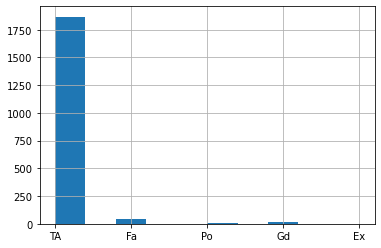

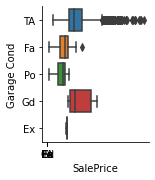

In [74]:
datacleaningbox('Garage Cond')

'Kitchen Qual' is examined #Good deal of variability in boxplot. I am transforming into numbers. 1 is low quality. 5 is excellent.
#mapping={'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}

count     2049
unique       4
top         TA
freq      1046
Name: Kitchen Qual, dtype: object
0
['Gd' 'TA' 'Fa' 'Ex']
TA    1046
Gd     805
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64
count     878
unique      5
top        TA
freq      447
Name: Kitchen Qual, dtype: object
0
['Fa' 'TA' 'Gd' 'Ex' 'Po']
TA    447
Gd    354
Ex     53
Fa     23
Po      1
Name: Kitchen Qual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


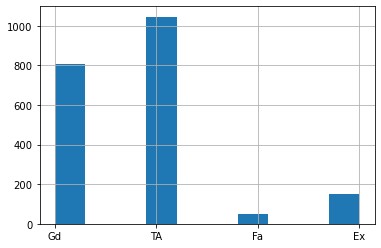

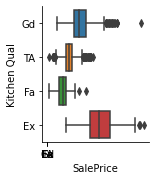

In [75]:
datacleaningbox('Kitchen Qual')

The next 10 code statements change through this mapping={'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}. This would not work if put in the same cell. This transforms most of the variable for the analysis

In [76]:
dftrain==dftrain.replace('Ex', 5, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2047,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
dftrain==dftrain.replace('Gd', 4, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2047,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
dftrain==dftrain.replace('TA', 3, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2047,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
dftrain==dftrain.replace('Fa', 2, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2047,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
dftrain==dftrain.replace('Po', 1, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2047,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
dftest==dftest.replace('Ex', 5, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
dftest==dftest.replace('Gd', 4, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
dftest==dftest.replace('TA', 3, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [84]:
dftest==dftest.replace('Fa', 2, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
dftest==dftest.replace('Po', 1, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
print(dftrain['Kitchen Qual'].unique())

[4 3 2 5]


In [87]:
print(dftest['Kitchen Qual'].unique())

[2 3 4 5 1]


In [88]:
print(dftrain['Kitchen Qual'].dtypes)

int64


'Paved Drive' is examined. This does not have good intuition, and most are Y.

count     2049
unique       3
top          Y
freq      1859
Name: Paved Drive, dtype: object
0
['Y' 'N' 'P']
Y    1859
N     151
P      39
Name: Paved Drive, dtype: int64
count     878
unique      3
top         Y
freq      790
Name: Paved Drive, dtype: object
0
['Y' 'N' 'P']
Y    790
N     65
P     23
Name: Paved Drive, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


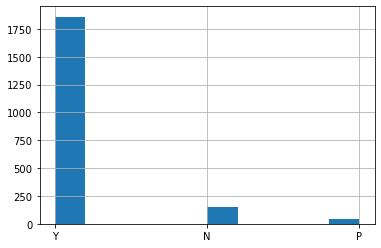

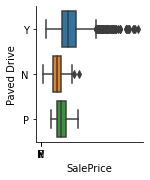

In [89]:
datacleaningbox('Paved Drive') 


count    9.000000
mean     3.444444
std      1.013794
min      2.000000
25%      3.000000
50%      4.000000
75%      4.000000
max      5.000000
Name: Pool QC, dtype: float64
2040
[nan  2.  4.  5.  3.]
4.0    4
2.0    2
3.0    2
5.0    1
Name: Pool QC, dtype: int64
count    4.0
mean     4.5
std      1.0
min      3.0
25%      4.5
50%      5.0
75%      5.0
max      5.0
Name: Pool QC, dtype: float64
874
[nan  5.  3.]
5.0    3
3.0    1
Name: Pool QC, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Pool QC  SalePrice
Pool QC    1.000000   0.422219
SalePrice  0.422219   1.000000


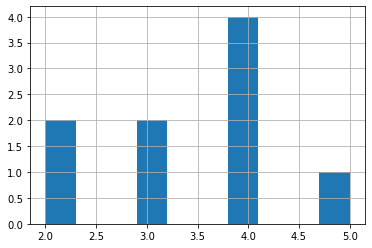

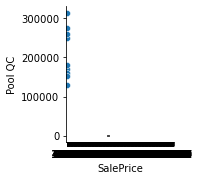

In [90]:
datacleaningbox('Pool QC') #9 observations--exclude as outliers

'Electrical' is examined. The fuse box is too granular to make a difference and 1868 are standard.

count      2049
unique        5
top       SBrkr
freq       1867
Name: Electrical, dtype: object
0
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
SBrkr    1867
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64
count       877
unique        4
top       SBrkr
freq        813
Name: Electrical, dtype: object
1
['FuseP' 'SBrkr' 'FuseA' 'FuseF' nan]
SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


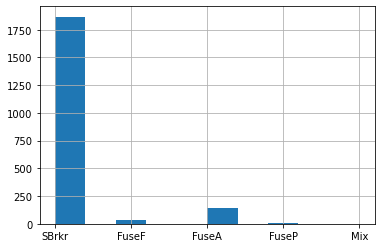

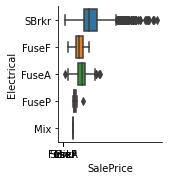

In [91]:
datacleaningbox('Electrical')

The next 4 code statements change the yes, no statements to 1, 0 to turn into dummies.

In [92]:
dftrain == dftrain.replace('Y', 1, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2047,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
dftrain == dftrain.replace('N', 0, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2047,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [94]:

dftest == dftest.replace('Y', 1, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
dftest == dftest.replace('N', 0, inplace=True)

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


'Central Air' is examined. The vast majority have central air but worth a lasso or ridge attempt. Transformed to 1,0 dummy





count    2049.000000
mean        0.931186
std         0.253199
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Central Air, dtype: float64
0
[1 0]
1    1908
0     141
Name: Central Air, dtype: int64
count    878.000000
mean       0.937358
std        0.242457
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Central Air, dtype: float64
0
[0 1]
1    823
0     55
Name: Central Air, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
             Central Air  SalePrice
Central Air     1.000000   0.277734
SalePrice       0.277734   1.000000


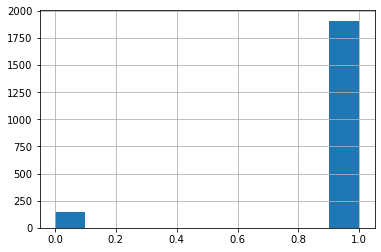

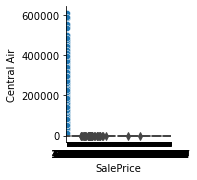

In [96]:
datacleaningbox('Central Air')

In [97]:
print(dftrain['Central Air'].unique())

[1 0]


count        2049
unique          6
top       CompShg
freq         2023
Name: Roof Matl, dtype: object
0
['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']
CompShg    2023
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64
count         878
unique          6
top       CompShg
freq          861
Name: Roof Matl, dtype: object
0
['CompShg' 'Metal' 'WdShake' 'Tar&Grv' 'WdShngl' 'Roll']
CompShg    861
Tar&Grv      8
WdShake      5
WdShngl      2
Metal        1
Roll         1
Name: Roof Matl, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


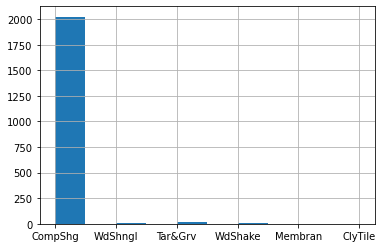

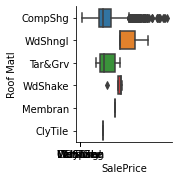

In [98]:
datacleaningbox('Roof Matl')  #2023 are one category--excluded

'Heating QC' is examined. It shows high variation and high correlation. Included

count    2049.000000
mean        4.158614
std         0.964064
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Heating QC, dtype: float64
0
[5 3 4 2 1]
5    1064
3     596
4     319
2      67
1       3
Name: Heating QC, dtype: int64
count    878.000000
mean       4.127563
std        0.944113
min        2.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Heating QC, dtype: float64
0
[4 3 5 2]
5    429
3    267
4    157
2     25
Name: Heating QC, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Heating QC  SalePrice
Heating QC    1.000000   0.458211
SalePrice     0.458211   1.000000


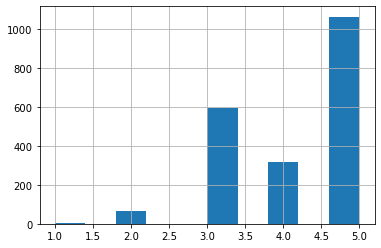

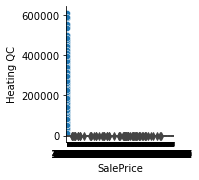

In [99]:
datacleaningbox('Heating QC')


count     1994
unique       6
top        Unf
freq      1748
Name: BsmtFin Type 2, dtype: object
55
['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
Unf    1748
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64
count     853
unique      6
top       Unf
freq      749
Name: BsmtFin Type 2, dtype: object
25
['Unf' 'LwQ' nan 'ALQ' 'GLQ' 'Rec' 'BLQ']
Unf    749
LwQ     29
Rec     26
BLQ     20
ALQ     18
GLQ     11
Name: BsmtFin Type 2, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


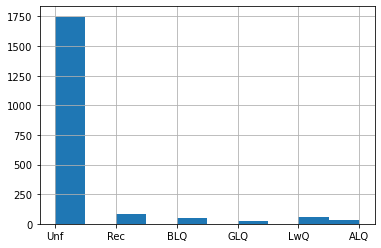

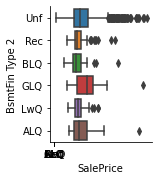

In [100]:
datacleaningbox('BsmtFin Type 2') #very little variation-excluded

'BsmtFin Type 1' is examined. While there is gradation, the number of features already is large. Bsmt is included in square feet already.

count     1995
unique       6
top        GLQ
freq       615
Name: BsmtFin Type 1, dtype: object
54
['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
GLQ    615
Unf    603
ALQ    292
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64
count     853
unique      6
top       Unf
freq      248
Name: BsmtFin Type 1, dtype: object
25
['Unf' 'GLQ' 'BLQ' 'Rec' 'ALQ' nan 'LwQ']
Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: BsmtFin Type 1, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


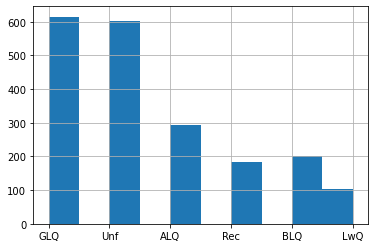

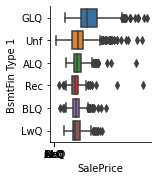

In [101]:
datacleaningbox('BsmtFin Type 1') 

'Bsmt Exposure' is examined. Too detailed for the number of features we have.

count    1995.000000
mean        3.010025
std         0.305253
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Bsmt Cond, dtype: float64
54
[ 3.  4. nan  2.  1.  5.]
3.0    1833
4.0      89
2.0      65
1.0       5
5.0       3
Name: Bsmt Cond, dtype: int64
count    853.000000
mean       2.992966
std        0.290616
min        2.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Bsmt Cond, dtype: float64
25
[ 3.  4. nan  2.]
3.0    781
2.0     39
4.0     33
Name: Bsmt Cond, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           Bsmt Cond  SalePrice
Bsmt Cond   1.000000   0.176309
SalePrice   0.176309   1.000000


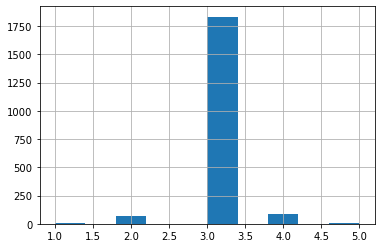

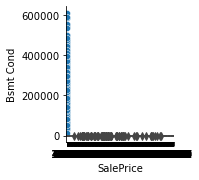

In [102]:
datacleaningbox('Bsmt Cond')#Doesn't show much variability-excluded

'Foundation' is examined. This is excluded as this is usually seen at inspection. 
This is eventually fixed, leading to a buy or no buy rather than price change. Given the number of features already entered, this was excluded.

count      2049
unique        6
top       PConc
freq        925
Name: Foundation, dtype: object
0
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
PConc     925
CBlock    863
BrkTil    220
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64
count       878
unique        6
top       PConc
freq        383
Name: Foundation, dtype: object
0
['Stone' 'CBlock' 'PConc' 'BrkTil' 'Slab' 'Wood']
PConc     383
CBlock    381
BrkTil     90
Slab       15
Stone       6
Wood        3
Name: Foundation, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


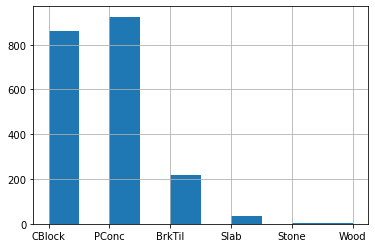

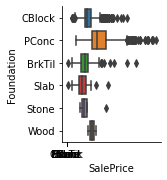

In [103]:
datacleaningbox('Foundation')  

'Exter Cond' is examined. The vast majority are average (1778) so excluded.

count    2049.000000
mean        3.085896
std         0.372965
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Exter Cond, dtype: float64
0
[3 4 2 5 1]
3    1776
4     215
2      49
5       7
1       2
Name: Exter Cond, dtype: int64
count    878.000000
mean       3.084282
std        0.369540
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Exter Cond, dtype: float64
0
[2 3 4 5 1]
3    770
4     84
2     18
5      5
1      1
Name: Exter Cond, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Exter Cond  SalePrice
Exter Cond    1.000000   0.036247
SalePrice     0.036247   1.000000


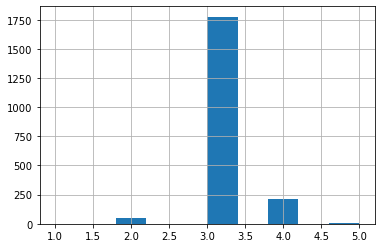

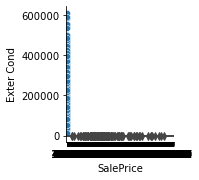

In [104]:
datacleaningbox('Exter Cond') 

'Exter Qual' is examined. It has a high correlation so included.

count    2049.000000
mean        3.406540
std         0.588112
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Exter Qual, dtype: float64
0
[4 3 5 2]
3    1245
4     697
5      81
2      26
Name: Exter Qual, dtype: int64
count    878.000000
mean       3.379271
std        0.559670
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Exter Qual, dtype: float64
0
[3 4 2 5]
3    552
4    292
5     25
2      9
Name: Exter Qual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Exter Qual  SalePrice
Exter Qual    1.000000   0.712062
SalePrice     0.712062   1.000000


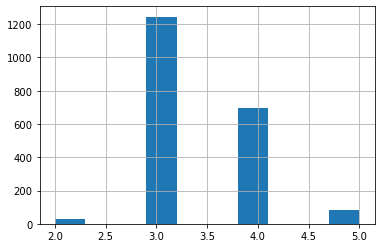

In [ ]:
datacleaningbox('Exter Qual')

'Exterior 2nd' is examined and excluded. This detail does not seem worth including given the number of existing features especially when this is similar.

In [ ]:
datacleaningbox('Exterior 2nd')

'Heating is examined.'Virtually all, 2016 are ga. No variation so no help-excluded

In [ ]:
datacleaningbox('Heating')  

'Garage Type' is examined and excluded. The type of garage seems less relevant than having a garage that was included in garage sq feet. Moreover, too many other variables have been included

In [ ]:
datacleaningbox('Garage Type') 

In [ ]:
dftrain.shape

In [ ]:
dftest.shape

## [Exploratory Data Analysis and Data Visualizations](#Exploratory-Data-Analysis-and-Data-Visualizations)


* The previous section Data Cleaning goes hand in hand with Exploratory Data Analysis. With each variable, correlation between the feature and target was examined. A Box Plot or Pair Plot between the feature and target was created. A histogram of each feature was used to check the distribution of data. Unique values and data types were checked. This is all detailed for every variable above. This section provides a "Cliff Notes" visual view of the key variables.


* This section shows relevant variables for the modeling analysis. First, summary statistics are provided for the key variables used in the analysis. Below that, you will find a list of variables that have correlation based on R2 of .35 or higher with the target, Sale Price.  Then, there is a features heatmap with higher than .5 R2 correlation. As measured by R2, the absolute value would tell you how strong a linear relationship exists between the feature and target;the closer to 1, the greater the relationahip. 


* Further down are histograms of the key variables. Distributions are examined and evaluated at an individual level above in comments above the code in the cleaning section. In describing the target, it should be noted that taking the natural log of the target would push the histogram together, allowing for a better predictive process. However, this would also make the model more complicated, making it more difficult to explain. Given the political nature of this project, simpler was considered better.


* As you might imagine, the data science process links all of these sections. Using the Lasso Model, several coefficients were eliminated from the final list of variables. This included Masonry Type_None, Central Air, Open Porch SF, Total Rms Abv Grd, and MS Subclass 60 were eliminated due to multicollinearity. 

In [ ]:
dftrain.describe()[['SalePrice','Garage Area','Total Bsmt SF', 'Overall Qual','Full Bath',\
                    'square_feet', 'neighborhood_NridgHt', 'Fireplaces']]

As discussed in the summary above, one observation to note about the dependent variable, SalePrice, and demonstrated on the histogram below is the positive skew. The maximum home sale price is 611,657 dollars whereas the 75 percentile is 214,000 dollars. This suggests that there may be outliers that can distort the "usual" prediction.

In [ ]:
dftrain.describe()[['BsmtFin SF 1','Kitchen Qual', 'Heating QC', 'Exter Qual',
                    'Wood Deck SF','Year Built', 'Lot Area', 'Mas Vnr Area', 'Sale Type_New']]

In [ ]:
dftrain.corr()[['SalePrice']][(dftrain.corr()['SalePrice'].sort_values().abs() > .35)]

The above list shows high correlation variables.

In [ ]:
sns.pairplot(dftrain, x_vars=['Garage Area','Total Bsmt SF', 'Overall Qual','Full Bath','square_feet', \
         ], y_vars=['SalePrice']) 

The graphs show a linear relationship between the features and target.

In [ ]:
sns.pairplot(dftrain, x_vars=['Fireplaces', 'BsmtFin SF 1', 'Kitchen Qual', 'Heating QC', 'Exter Qual' 
                              ], y_vars=['SalePrice']) 

The graphs show a linear relationship between the features and target.

In [ ]:
sns.pairplot(dftrain, x_vars=['Exter Qual', 'Wood Deck SF',
          'Year Built', 'Lot Area', 'Mas Vnr Area'], y_vars=['SalePrice']) 

The graphs show a linear relationship between the features and target.

In [ ]:
ax=sns.heatmap(dftrain.corr()[['SalePrice']][(dftrain.corr()['SalePrice'].sort_values().abs() > .5)], \
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set(title = "Correlation with Target")

The heatmap above shows features with .5 R2 correlation score. 
These variables individually show have a strong linear relationship.
However, they may correlate with each other, violating assumption 6 
of multivariate regression, independence of features. While this is 
a cause for concern, the Lasso and Ridge Modeling has filtered out the variables to minimize this concern.

In [ ]:
dftrain[['SalePrice','Garage Area','Total Bsmt SF', 'Overall Qual','Full Bath',\
        'square_feet', 'neighborhood_NridgHt', 'Fireplaces', 'BsmtFin SF 1',\
        'Kitchen Qual', 'Heating QC', 'Exter Qual','Wood Deck SF','Year Built',
         'Lot Area', 'Mas Vnr Area', 'Sale Type_New']].hist(figsize=(13,13));

The variables above are all significant in adding explanatory power to the predicted price. Each, in its dimension, helps create the line to tie the data points together.

## [Modeling](#Modeling)

###  Caution and Methodology

* To summarize the data cleaning and exploratory data analysis, it appears that there will be a workable model to help the Mayor. However, the small amount of observations used in this modeling based on the dataset provided means that we will not be able to hit the predictive levels that data science has reached in many medical fields. A rule of thumb is that for every 400 observations, one feature can be added.  Here, we are using more than that. If there were more data, this analysis would be much better, and the predictive power of the model would be stronger.


* Three models, mulitvariate linear regression,  Lasso Penalty Multivariate Linear Regression, and Ridge Penalty Multivariate Linear Regression were used to examine the relationship between the features and the target variable. Even though the Mayor has set his 35,000 root mean square baseline that his intern achieved to compare this model to, generally, these models on the most basic level are compared to the using the average for SalePrice as a predictor for all and compare it to the model.


* While the Mayor has his validation set to check the model that is scored by Kaggle, this analysis also used the train, test, and split and cross validation methods of resampling data. This was done to mimic new data being provided to the model prior to Kaggle scoring. The data was divided into fifths. 80 percent was used to 'teach' the model, and the remaining 20 percent was used to generalize a prediction to this 'test' data. This 'teaching and 'testing' was then rotated to check the prowess of the model. This methodology was used for all three models. 


* In analyzing the value of these models, it is important to use metrics beyond the Mayor's validation set. Certainly, root mean square error (RMSE), the metric that the Mayor will evaluate us on is given. The closer to 0 it is, the better. However, the magnitude of y, the dependent variable, changes this score. Therefore, one can't compare RMSE of a model predicting sales of GM and with a mom and pop gum manufacturer. Perhaps better, the Coefficient of Determination, r squared(R2), is a popular metric. An R2 value is the  percentage of variability in the target that is explained by the independent variables in the model. This can be compared across models. This R2 is used for the cross validation and train test split as described avove. The R2 used for the traditional baseline


* A key difference in how the data was treated is that the Lasso model and Ridge model were scaled first to prevent the magnitude of the data from distorting the result. This is not necessary for ordinary multivariate regression models. The next key distinction for these models is regularization.


* As Kiefer Katovich of General Assembly in his 'Introduction to Regularization' states, "the goal of 'regularizing' regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model. Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares. In other words, the minimization becomes a balance between the error between predictions and true values and the size of the coefficients.' In laymen's term, Lasso and Ridge attempt to simplify and streamline the model.


### Four Runs Made
* The initial run of features included: Garage Cars,  Total Bsmt SF, Overall Qual,  Full Bath, and square_feet resulting in a Kaggle Score of 36800.


* The second run with all three models running included the following features:Garage Area, Total Bsmt SF, Overall Qual, Full Bath, square_feet, MS SubClass_60, neighborhood_NridgHt, Fireplaces, TotRms AbvGrd, BsmtFin SF 1, Kitchen Qual, Heating QC, and Exter Qual.  This resulted in a low Kaggle Score of 32686.


* The third run with all three models included the following features:Garage Area, Total Bsmt SF, Overall Qual, Full Bath, square_feet, MS SubClass_60, neighborhood_NridgHt, Fireplaces, TotRms AbvGrd, BsmtFin SF 1, Kitchen Qual, Heating QC, Exter Qual, Wood Deck SF, Open Porch SF, Year Built, Lot Area, Mas Vnr Area, Central Air, Masonry Type_None, and Sale Type_New. The best Kaggle RMSE Score was 31850.


* The fourth run used Lasso to remove variables. Lasso suggested that Masonry Type_None, Central Air, Open Porch Sf, total Rms Abv Grd, and MS Subclass 60 be removed from the model. This last run was left with the following features :Garage Area,Total Bsmt SF, Overall Qual, Full Bath, square_feet, neighborhood_NridgHt, Fireplaces, BsmtFin SF 1, Kitchen Qual, Heating QC, Exter Qual, Wood Deck SF, Year Built, Lot Area, Mas Vnr Area, and Sale Type_New. This resulted in a RMSE Kaggle Score of 31502.    

### Ordinary Multivariate Regression Model

In [ ]:
#define features(X) and target
features=['Garage Area','Total Bsmt SF', 'Overall Qual','Full Bath','square_feet', \
         'neighborhood_NridgHt', 'Fireplaces','BsmtFin SF 1', 'Kitchen Qual', 
          'Heating QC', 'Exter Qual', 'Wood Deck SF','Year Built', 'Lot Area', 'Mas Vnr Area', 'Sale Type_New']

#Features
X=dftrain[features]
target=dftrain['SalePrice']

#y is the target
y = target 


In [ ]:
#This is the resampling of data discussed above
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=41)

#verifying  dimensions
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
#Instantiate the estimator
lr = LinearRegression(n_jobs=-1)

#fit estimator
lr.fit(X_train, y_train)

#predict to score
odd=lr.predict(X_test)

# The intercept and Coefficients
print('Coefficient values of the Model are ', lr.coef_)
print('Intercept value is ', lr.intercept_)

Holding all other coefficients constant, each coefficient above aligned to the order of the features suggests that for a one unit increase in the corresponding independent variable, will have the coefficient effect on the target(SalePrice) otherwise known as the dependent variable. 

In [ ]:
#Scoring R2-metric on Train data
lr.score(X_train, y_train)

In [ ]:
#Scoring R2-metric on Test 
lr.score(X_test, y_test)  

These R2 scores mean that for the Train data, the independent variables in the model explains 82.7 percent of the variability in the dependent variable price. For the Test data, the independent variables in the model explains 86.9 percent of the variability in the dependent variable price.

In [ ]:
print('Below root mean squared error')
print(np.sqrt(metrics.mean_squared_error(y_test, odd)))

While there is no such thing as a good root mean squared error as the scale of the target changes the metric, the closer to 0 it is the less error. Since the Mayor has made beating the 35,000 score his interns and volunteers achieved, this 27,417 looks good.

In [ ]:
ntr=cross_val_score(lr, X_train, y_train, cv=5, n_jobs = -1) 
print(ntr)
f'{round(mean(ntr), 2)} \u00B1 {round(2 * stdev(ntr), 2)}'
#I believe there are outliers and that my model is overfit

Aboves is the cross validation score that is less than my train score, which is in line with an expected value.

### Baseline Score is below

In [ ]:
# Baseline Null Prediction---the mean
#all R2 scores should be zero.
#
dr= DummyRegressor(strategy= 'mean')
dr.fit(X_train,y_train)
dr.predict(X_train)
za=dr.score(X_test, y_test)
print(za.round(decimals=1))

ymeantrain=[y_train.mean() for number in range(len(X_train))]
print(metrics.r2_score(y_train, ymeantrain))

ymeantest=[y_test.mean() for number1 in range(len(X_test))]
print(metrics.r2_score(y_test, ymeantest))

yall=[y.mean() for number2 in range(len(y))]
print(metrics.r2_score(y, yall))

print('Below root mean squared error')
print(np.sqrt(metrics.mean_squared_error(y_train, ymeantrain)))

The traditional baseline of the mean to compare this model to is listed above. Beating 0 and about 80,000 for R2 and RMSE suggest success in this model.

###  The Lasso and Ridge Models are below
* Both regularization methods require scaling first. The code below was taken from Sophie Tabac's Intro to Regularization jupyter notebook

In [ ]:
#Instantiate
ss = StandardScaler()
# Fit and transform.
ss.fit(X_train, y_train)
X_train_sc = ss.transform(X_train)
# Transform.
X_test_sc = ss.transform(X_test)

### Lasso

In [ ]:
#200 alphas with .05 steps
l_alphas = np.arange(0.01, 10.0, 0.05)

# model using lasso_coefs function from above
l_coefs = lasso_coefs(X_train_sc, y_train, l_alphas)

housing_coefs_df = pd.DataFrame(l_coefs, columns = features)
housing_coefs_df['alpha'] = l_alphas
for col, coef in housing_coefs_df.iloc[housing_coefs_df.index.max()]\
                              .iteritems():
    if not coef:
        print(col, coef)

The lack of output suggests all of my variables are good, but I will make sure by checking the coefficients with the high alphas below.

In [ ]:
housing_coefs_df  

The method below, Lasso CV, was used to eliminate several independent variables.

In [ ]:
# fit LassoCV
lasso_cv = LassoCV(cv = 10).fit(X_train_sc, y_train)
oddlasso=lasso_cv.predict(X_test_sc)

#R2 score on Xtrain
print('Xtrainscore:', lasso_cv.score(X_train_sc, y_train))


In [ ]:
#Xtest R2
print('Xtest R2:', lasso_cv.score(X_test_sc, y_test))

In [ ]:
#Cross Value Score
ntx=cross_val_score(lasso_cv, X_train_sc, y_train, cv = 5, n_jobs = -1)

print(ntx)
f'{round(mean(ntx), 2)} \u00B1 {round(2 * stdev(ntx), 2)}'

In [ ]:
print('Below is root mean squared error:')
print(np.sqrt(metrics.mean_squared_error(y_test, oddlasso)))

In [ ]:
print('Coefficient values of the Model are ', lasso_cv.coef_)
print('Intercept value is ', lasso_cv.intercept_)

Holding all other coefficients constant, each coefficient above aligned to the order of the features suggests that for a one unit increase in the corresponding independent variable, will have the coefficient effect on the target(SalePrice) otherwise known as the dependent variable.

## Ridge
Train_test_split is done from the original model. This was scaled during Lasso 
so no need to rescale. 


In [ ]:
#Instantiate
ridge_reg = RidgeCV()

#Fit the model
ridge_reg.fit(X_train_sc, y_train)

#Predict
oddridge=ridge_reg.predict(X_test_sc)

# X_train_sc R2 score below
print(ridge_reg.score(X_train_sc, y_train))

In [ ]:
# X_test_sc R2 score below
print(ridge_reg.score(X_test_sc, y_test))

In [ ]:
ntq=cross_val_score(ridge_reg, X_train_sc, y_train, cv = 5, n_jobs = -1)

#R2
print(ntq)
f'{round(mean(ntq), 2)} \u00B1 {round(2 * stdev(ntq), 2)}'

In [ ]:
print('Below is root mean squared error:')
print(np.sqrt(metrics.mean_squared_error(y_test, oddridge)))

In [ ]:
print('Coefficient values of the Model are ', ridge_reg.coef_)
print('Intercept value is ', ridge_reg.intercept_)

Holding all other coefficients constant, each coefficient above aligned to the order of the features suggests that for a one unit increase in the corresponding independent variable, will have the coefficient effect on the target(SalePrice) otherwise known as the dependent variable.

In [ ]:
# Kaggle Submission Without Lasso
X2=dftest[features]
prediction=lr.predict(X2)

#Kaggle Submission With Lasso
X3=(dftest[features])
X3sc=ss.transform(X3)
predictionlasso=lasso_cv.predict(X3sc)

#Kaggle Submission With Ridge
#X3 works for Ridge as well.
predictionridge=ridge_reg.predict(X3sc)

In [ ]:
# New dataframe
dfpredframe=dftest
dfpredframelasso=dftest
dfpredframeridge=dftest

In [ ]:
dfpredframe[['SalePrice']]=[g for g in prediction]

In [ ]:
dfpredframelasso[['SalePrice']]=[h for h in predictionlasso]

In [ ]:
dfpredframeridge[['SalePrice']]=[k for k in predictionridge]

In [ ]:
#These were used to load the csv into the data folder.
header =['Id','SalePrice']
#dfpredframe.to_csv('BavdaKaggle1.csv', columns=header, index=False)
#dfpredframelasso.to_csv('BavdaKaggle1lasso.csv', columns=header, index=False)
#dfpredframeridge.to_csv('datasets/BavdaFinal.csv', columns=header, index=False)

The histograms below are to check the normality of the distribution for the residuals. This is also one of the assumptions of a multivariate linear regression. The scatter plot is to check for homoscedasticity.

In [ ]:
residuals = y_test - odd

In [ ]:
plt.hist(residuals);

In [ ]:
plt.scatter(odd, residuals)

In [ ]:
residualslas = y_test-oddlasso

In [ ]:
plt.hist(residualslas);

In [ ]:
plt.scatter(oddlasso, residualslas)

In [ ]:
residualsridge = y_test-oddridge
plt.hist(residualsridge);

In [ ]:
plt.scatter(oddridge, residualsridge)

Checking to see if the natural log makes a difference below.

In [ ]:
y_test.map(np.log).hist()

Transforming exponentially and logarithmically may increase accuracy and reduce RMSE. I ran into a issue when I attempted to log my dummy variables. The log of 0 breaks the model. This required separating each dataframe and logging the non dummy variables. Then, the model would be run. If I had more time, I would venture further in both. I would suggest that in the next iteration of this model, if accuracy became extraordinarily important, a natural log model would be worth looking into.

## [Conclusions and Recommendations](#Conclusions-and-Recommendations)

As the introduction explains, the Mayor has hired Bavda Consulting to develop a model that predicts prices on home sales in Ames, Iowa. The purpose of this model is to help the Mayor identify and root out discrimination in housing. The model will serve as a benchmark as a predictor based on non-discriminatory factors such as square feet, the age of the home, the amount of Garage are, etc. This will demonstrate if traditionally disadvantaged communities are paying a premium on housing in Ames. There are two key recommendation categories that Bavda Consulting can make. First, there is a production model recommendation. Second, there is a usage recommendation. Prior to this, it should be said that there were basic assumptions of linearity between the variables along with other statistical assumption. There were also about 2,000 observations. This is a small dataset and should be supplemented with more observations to create a better predictor.

### Production Model Recommendation


The production model chosen was the Ridge Penalty Multivariate Linear Regression model. Given that the Mayor has deemed Root Mean Squared Error (RMSE) as her metric on her validation test, this model is the one that minimized RMSE on the Kaggle check. It had the least error of these models. It represents the least average distance between the model and reality. However, as a professional, I would suggest that the Ordinary Multivariate Linear Regression(OMLR) model and R2 be the ones used for the city's purposes.


First of all, the OMLR model is the simplest model to explain. Given that the Mayor is attempting to fulfill campaign promises and has to explain her actions to the general public, simplicity may be the best choice. As is, statistical analysis is often see as magic rather than science. To attempt to explain regularization to data science students is difficult, let alone to the general public. The reality is that most people falsely believe that if they cannot understand something, then there is a problem with the substance, not their own faculties. The universe is not obligated to make sense to each of us. However, understanding the model will get buy-in from his constituents. 


Moreover, if transactions are going to be flagged as discriminatory and the model is going to be used as evidence in court and administrative hearings, the fact finder whether that be jury or judge is going to have to understand the model to find in favor of the Mayor. If not understood, the Mayor will lose. Without the deterrent of adverse legal findings based on the model, the model will become toothless.


Furthermore, the OMLR model's metrics are not that different than the Ridge and Lasso models. The RMSE on the test data for OMLR was 27,417 while Lasso and Ridge were 27,559 and 27,444, respectively. While the Kaggle score was minimized by Ridge, this could simply be a quirk in the data-randomness at work. The Cross Validation R2 scores are nearly identical for all three models coming in at .80. This means that 80 percent of the variation in Sale Price can be explained by the features in the model. Given that there is irreducible error (some level of randomness) and discrimination may be at work to explain some of these transactions, 80 percent may be the highest this dataset will allow. R2 may also be a better metric. R2 does not depend on the scale of the dependent variable. It is always between  0 and 1, meaning it is more interpretable whereas RMSE depends on the scale.


### Model Usage Recommendation

The first recommendation would be to create an interactive version of the model on the city's website. Each buyer, advantaged or disadvantaged, could input the variables for the house they are seeking. The independent variables could be changed and played with. The garage area, total basement square feet, the overall quality rating from the assessor, the number of bathrooms, square feet of the house, whether the house was in the Northridge neighborhood, the amount of fireplaces, the finished square feet of the basement, the kitchen quality, the heating system's quality and condition, the exterior quality, the wood deck square feet, the year built, the lot area, masonry veneer area, and whether the house was brand new could all be played with. 


Each coefficient detailed in the Modeling section could be ordered in the same way as the features.  Each one unit increase in the independent variable would suggest a coefficient increase in the sale price. This would guide the community in expectations of the appropriate price and alert buyers if they sense they are being made to pay a premium regardless of advantaged status.


Second, another more directly related to fair housing recommended use is to send in two couples, one traditionally advantaged, and the other traditionally disadvantaged, to see the price agreed upon at the new home developer's office. The model can serve as a benchmark to evaluate the discrepancy between the two prices to determine if a premium was required. The model also could be used to identify potential discrimination by entering in data from housing transactions to see if there is trend. The city would know where to use its limited resources.

Third, given that there can be many uses for a model that predicts sale prices and the city has limited resources, the Mayor may well license the model to real estate agencies to earn extra revenue to fund her fight for integration. This would be a win, win for both parties.

This completes our analysis, conclusion, and recommendations. Please contact Bavda Consulting with any questions, suggestions and comments.